In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: read df /content/test_labeled_0.85.csv

import pandas as pd

df = pd.read_csv('/content/test_labeled_0.7.csv')
df.head()

,Unnamed: 0,image_name,subfolder_name,cell_number,file_path,label,LABEL
0,0,21,test,a1,/content/nokhbegan_dataset_test/Test data_micr...,0,0
1,1,21,test,a2,/content/nokhbegan_dataset_test/Test data_micr...,0,0
2,2,21,test,a3,/content/nokhbegan_dataset_test/Test data_micr...,0,0
3,3,21,test,a4,/content/nokhbegan_dataset_test/Test data_micr...,0,0
4,4,21,test,a5,/content/nokhbegan_dataset_test/Test data_micr...,0,0


In [ ]:
# prompt: drop column label and Unnamed: 0

df = df.drop(['label', 'Unnamed: 0'], axis=1)
df.head()


,image_name,subfolder_name,cell_number,file_path,LABEL
0,21,test,a1,/content/nokhbegan_dataset_test/Test data_micr...,0
1,21,test,a2,/content/nokhbegan_dataset_test/Test data_micr...,0
2,21,test,a3,/content/nokhbegan_dataset_test/Test data_micr...,0
3,21,test,a4,/content/nokhbegan_dataset_test/Test data_micr...,0
4,21,test,a5,/content/nokhbegan_dataset_test/Test data_micr...,0


In [ ]:
# prompt: add two columns named Micro_Row_Number and Micro_Column_Number and fill their values as this: look at cell_number value, if it starts with a value of Micro_Row_Number is 1, other mappings are as {b:2,c:3,d:4,e:5,f:6} and for  Micro_Column_Number remove first charechter of cell_number and fill the  Micro_Column_Number with remaining charechters of cell_number after removing first one

def map_row_number(cell_number):
  if cell_number.startswith('a'):
    return 1
  elif cell_number.startswith('b'):
    return 2
  elif cell_number.startswith('c'):
    return 3
  elif cell_number.startswith('d'):
    return 4
  elif cell_number.startswith('e'):
    return 5
  elif cell_number.startswith('f'):
    return 6
  else:
    return None

df['Micro_Row_Number'] = df['cell_number'].apply(map_row_number)
df['Micro_Column_Number'] = df['cell_number'].str[1:]

df


,image_name,subfolder_name,cell_number,file_path,LABEL,Micro_Row_Number,Micro_Column_Number
0,21,test,a1,/content/nokhbegan_dataset_test/Test data_micr...,0,1,1
1,21,test,a2,/content/nokhbegan_dataset_test/Test data_micr...,0,1,2
2,21,test,a3,/content/nokhbegan_dataset_test/Test data_micr...,0,1,3
3,21,test,a4,/content/nokhbegan_dataset_test/Test data_micr...,0,1,4
4,21,test,a5,/content/nokhbegan_dataset_test/Test data_micr...,0,1,5
...,...,...,...,...,...,...,...
10555,100,test,f18,/content/nokhbegan_dataset_test/Test data_micr...,0,6,18
10556,100,test,f19,/content/nokhbegan_dataset_test/Test data_micr...,0,6,19
10557,100,test,f20,/content/nokhbegan_dataset_test/Test data_micr...,0,6,20
10558,100,test,f21,/content/nokhbegan_dataset_test/Test data_micr...,0,6,21


In [ ]:
# prompt: from df only keep records with LABEL equal to 1
# then drop columns subfolder_name	cell_number	file_path	LABEL
# and change name of image_name to image_number

# Keep only records with LABEL equal to 1
# Assuming you have a 'LABEL' column in your DataFrame (it's not in the provided code)
# Replace 'LABEL' with the actual column name if it's different

# Assuming you have a 'LABEL' column in your DataFrame
# If it doesn't exist, you'll need to modify the code to filter based on an actual column
if 'LABEL' in df.columns:
    df = df[df['LABEL'] == 1]

# Drop specified columns
df = df.drop(['subfolder_name', 'cell_number', 'file_path','LABEL'], axis=1)

# Rename image_name to image_number
df = df.rename(columns={'image_name': 'image_number'})

df


,image_number,Micro_Row_Number,Micro_Column_Number
18,21,1,19
51,21,3,8
53,21,3,10
63,21,3,20
75,21,4,10
...,...,...,...
10459,100,2,10
10509,100,4,16
10519,100,5,4
10535,100,5,20


In [ ]:
# prompt: make df all column values int

import pandas as pd
for column in df.columns:
  df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(int)


In [ ]:
df

,image_number,Micro_Row_Number,Micro_Column_Number
18,21,1,19
51,21,3,8
53,21,3,10
63,21,3,20
75,21,4,10
...,...,...,...
10459,100,2,10
10509,100,4,16
10519,100,5,4
10535,100,5,20


In [ ]:
df.dtypes

,0
image_number,int64
Micro_Row_Number,int64
Micro_Column_Number,int64


In [ ]:
df.to_csv('/content/test_labeled_0.7_final.csv', index=False)

In [ ]:
# Install unrar
!apt-get install unrar

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your .rar file
rar_file_path = '/content/drive/MyDrive/Test data_microcrack.rar'

# Create a directory for extraction
extraction_path = '/content/drive/MyDrive/extracted_test/'
!mkdir -p "$extraction_path"

# Extract the .rar file
!unrar x "$rar_file_path" "$extraction_path"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Test data_microcrack.rar

Creating    /content/drive/MyDrive/extracted_test/Test data_microcrack  OK
Extracting  /content/drive/MyDrive/extracted_test/Test data_microcrack/100.jpg       1%  OK 
Extracting  /content/drive/MyDrive/extracted_test/Test data_microcrack/21.jpg       2%  OK 
Extracting  /content/drive/MyDrive/extracted_test/Test data_microcrack/22.jpg       3%  OK 
Extracting  /content/drive/MyDrive/extracted_test/Test data_microcrack/23.jpg       4%  OK 
Extracting  /content/drive/MyDrive/extra

In [ ]:
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

def preprocess_image(img):
    # List to store rows that have less than or equal to 100 black pixels
    valid_rows = []

    # Iterate over each row in the image
    for row in img:
        # Count the number of pixels with value 0 in the row
        black_pixel_count = np.sum(row == 0)

        # If the row has 100 or fewer black pixels, add it to valid_rows
        if black_pixel_count <= 100:
            valid_rows.append(row)

    # Rebuild the image by stacking the valid rows
    cleaned_img = np.vstack(valid_rows)

    # Perform cropping: remove first 8 pixels from left, first 8 pixels from top,
    # last 8 pixels from right, and last 8 pixels from bottom
    cropped_img = cleaned_img[8:-8, 8:-8]  # Crop 8 pixels from each side

    return cropped_img  # Return the cleaned and cropped image directly

def post_process_image(sub_image):
    # Keep only the first 60 pixels from the left and right
    processed_img = sub_image[:, :60]
    right_edge = sub_image[:, -60:]
    processed_img = np.hstack((processed_img, right_edge))

    return processed_img

def extract_solar_cells(image, output_folder):
    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges and corresponding labels
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Get the indices for splitting
    indices = [min_values[label][1] for label in 'abcdef']  # A-F indices

    # Define sub-images based on calculated indices
    sub_images = {
        'a': image[0:indices[0], :],
        'b': image[indices[0]:indices[1], :],
        'c': image[indices[1]:indices[2], :],
        'd': image[indices[2]:indices[3], :],
        'e': image[indices[3]:indices[4], :],
        'f': image[indices[4]:, :]  # F + 1 to include the last row
    }

    # Define ranges for points in each sub-image
    point_ranges = [
        (250, 350), (550, 650), (850, 950), (1150, 1250),
        (1450, 1550), (1750, 1850), (2050, 2150), (2350, 2450),
        (2650, 2750), (2950, 3050), (3250, 3350), (3550, 3650),
        (3850, 3950), (4150, 4250), (4450, 4550), (4750, 4850),
        (5050, 5150), (5350, 5450), (5650, 5750), (5950, 6050),
        (6250, 6400)
    ]

    # Calculate and store minimum values for each sub-image
    final_sub_images = {}
    padding = 4  # Padding of 3 pixels on both sides

    for label, sub_image in sub_images.items():
        horizontal_avg = np.mean(sub_image, axis=0)
        points = {}

        for idx, (start, end) in enumerate(point_ranges):
            min_val = np.min(horizontal_avg[start:end + 1])
            min_idx = np.argmin(horizontal_avg[start:end + 1]) + start
            points[f'{label}_{idx + 1}'] = (min_val, min_idx)

        # Last point for each sub-image
        points[f'{label}_22'] = (horizontal_avg[-1], len(horizontal_avg) - 1)

        # Create sub-images based on the points with padding
        indices = [0] + [points[f'{label}_{i}'][1] for i in range(1, 23)] + [sub_image.shape[1]]  # Include the starting point and end of image
        for i in range(len(indices) - 1):
            if i < 22:  # Ensure only sub-image 1 to 22 are created
                start_idx = max(indices[i] - padding, 0)  # Apply padding
                end_idx = min(indices[i + 1] + padding, sub_image.shape[1])  # Apply padding
                sub_img = sub_image[:, start_idx:end_idx]  # Extract the sub-image
                # Post-process the sub-image before saving
                processed_img = post_process_image(sub_img)
                final_sub_images[f'sub_image_{label}{i + 1}'] = processed_img


    # Create a folder for the output if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save the final sub-images directly
    for name, sub_image in final_sub_images.items():
        cv2.imwrite(f'{output_folder}/{name}.png', sub_image)

# Function to process all images in the dataset
def process_dataset(source_dir, target_dir):
    # Add tqdm progress bar for processing the dataset
    for subdir, _, files in tqdm(os.walk(source_dir), desc="Processing images", unit="file"):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                image_path = os.path.join(subdir, file)

                # Extract the source subfolder name and the image name to create the folder structure
                source_subfolder_name = os.path.basename(subdir)  # Get the subfolder name
                image_name = os.path.splitext(os.path.basename(image_path))[0]  # Get the image name without extension

                # Create the new subfolder in the target directory with the subfolder and image name
                output_folder = os.path.join(target_dir, source_subfolder_name, image_name)

                # Check if the output folder already exists and skip if so
                if os.path.exists(output_folder) and len(os.listdir(output_folder)) > 0:
                    print(f"Skipping {file}, already processed.")
                    continue  # Skip to the next image if already processed

                # Load and preprocess the image directly
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                cleaned_image = preprocess_image(img)

                # Extract solar cells and save them in the structured folder
                extract_solar_cells(cleaned_image, output_folder)

# Set paths and run
source_dir = '/content/drive/MyDrive/extracted_test'
target_dir = '/content/nokhbegan_dataset_test'

# Process the entire dataset
process_dataset(source_dir, target_dir)


Processing images: 2file [01:36, 48.01s/file]


In [ ]:
import shutil

# Define source and destination paths
source_folder = '/content/drive/MyDrive/new_nokhbegan_zip/labeled'
destination_folder = '/content/drive/MyDrive/nokhbegan_dataset_final/labeled'

# Copy the entire folder
shutil.copytree(source_folder, destination_folder)


'/content/drive/MyDrive/nokhbegan_dataset_final/labeled'

In [ ]:
import shutil
import os

# Source folder path
src_folder = '/content/drive/MyDrive/new_nokhbegan_zip/labeled/میکروکرک_تصاویر بدون برچسب'
#/content/drive/MyDrive/nokhbegan_dataset_final/H06240209000236A012987C19F1/H06240200814994_240208230016/sub_image_a1.png
# Destination folder (one level above)
dst_folder = '/content/drive/MyDrive/new_nokhbegan_zip/labeled/'

# Loop through all items in the source folder
for item in os.listdir(src_folder):
    item_path = os.path.join(src_folder, item)
    if os.path.isdir(item_path):  # Check if it's a directory
        shutil.move(item_path, dst_folder)  # Move the folder

print("Folders moved successfully!")


Folders moved successfully!


In [ ]:
pip install segmentation_models_pytorch

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.8 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16425 sha256=a1b8ab56b69434d9297ded5ca92c979f076fc2f108d202fe411c436903a17b0b
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=eb5b7f59c9c22c0bcd93a700c4d2d3d2390cfea55f2981d919026153d53dade7
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-pytorch

In [ ]:
from PIL import Image

image_path = '/content/drive/MyDrive/nokhbegan_dataset_final/H06240209000366A012987C19F1/H06240200847910_240209011455/sub_image_a1.png'

# Open the image using PIL
img = Image.open(image_path)

# Get the width and height
width, height = img.size

print(f"Image width: {width} pixels")
print(f"Image height: {height} pixels")

Image width: 120 pixels
Image height: 605 pixels


In [ ]:
import os
import shutil
from tqdm import tqdm

def zip_folder(src, zip_name):
    """
    Zips the entire folder.
    """
    # Create a zip archive of the source directory
    shutil.make_archive(zip_name, 'zip', src)
    return zip_name + '.zip'

def move_file_with_progress(src, dst):
    """
    Move a file with a progress bar.
    """
    # Get the size of the file
    total_size = os.path.getsize(src)

    # Set up progress bar
    with tqdm(total=total_size, desc="Moving zip file", unit="B", unit_scale=True) as pbar:
        with open(src, 'rb') as fsrc:
            with open(dst, 'wb') as fdst:
                while True:
                    # Read in chunks and write to the destination
                    buffer = fsrc.read(1024*1024)  # 1MB chunks
                    if not buffer:
                        break
                    fdst.write(buffer)
                    pbar.update(len(buffer))

    # Remove the source file after it has been moved
    os.remove(src)


# Define the source and destination paths
src_path =  '/content/nokhbegan_dataset_test'
dst_path = '/content/drive/MyDrive/'
zip_name = 'nokhbegan_dataset_test'  # The zip file will be named new_dataset_zip.zip

# Step 1: Zip the folder
zipped_file = zip_folder(src_path, zip_name)

# Step 2: Define the destination path for the zipped file
zipped_dst_path = os.path.join(dst_path, os.path.basename(zipped_file))

# # Step 3: Move the zipped file with progress bar
# if not os.path.exists(dst_path):
#     os.makedirs(dst_path)

# move_file_with_progress(zipped_file, zipped_dst_path)

# print(f"Zipped folder moved to {zipped_dst_path}")


In [ ]:
import zipfile
import os

# Define the zip file path and the extraction directory
zip_file_path = '/content/drive/MyDrive/nokhbegan_dataset_test.zip'
extract_dir = '/content/drive/MyDrive/nokhbegan_dataset_test'

# Ensure the extraction directory exists
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete!")


In [ ]:
/content/drive/MyDrive/new_nokhbegan/H06240209000236A012987C19F1/H06240200814994_240208230016

# trash code

In [ ]:
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

def preprocess_image(img):
    # List to store rows that have less than or equal to 100 black pixels
    valid_rows = []

    # Iterate over each row in the image
    for row in img:
        # Count the number of pixels with value 0 in the row
        black_pixel_count = np.sum(row == 0)

        # If the row has 100 or fewer black pixels, add it to valid_rows
        if black_pixel_count <= 100:
            valid_rows.append(row)

    # Rebuild the image by stacking the valid rows
    cleaned_img = np.vstack(valid_rows)

    # Perform cropping: remove first 8 pixels from left, first 8 pixels from top,
    # last 8 pixels from right, and last 8 pixels from bottom
    cropped_img = cleaned_img[8:-8, 8:-8]  # Crop 8 pixels from each side

    return cropped_img  # Return the cleaned and cropped image directly

def extract_solar_cells(image, output_folder):
    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges and corresponding labels
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Get the indices for splitting
    indices = [min_values[label][1] for label in 'abcdef']  # A-F indices

    # Define sub-images based on calculated indices
    sub_images = {
        'a': image[0:indices[0], :],
        'b': image[indices[0]:indices[1], :],
        'c': image[indices[1]:indices[2], :],
        'd': image[indices[2]:indices[3], :],
        'e': image[indices[3]:indices[4], :],
        'f': image[indices[4]:, :]  # F + 1 to include the last row
    }

    # Define ranges for points in each sub-image
    point_ranges = [
        (250, 350), (550, 650), (850, 950), (1150, 1250),
        (1450, 1550), (1750, 1850), (2050, 2150), (2350, 2450),
        (2650, 2750), (2950, 3050), (3250, 3350), (3550, 3650),
        (3850, 3950), (4150, 4250), (4450, 4550), (4750, 4850),
        (5050, 5150), (5350, 5450), (5650, 5750), (5950, 6050),
        (6250, 6400)
    ]

    # Calculate and store minimum values for each sub-image
    final_sub_images = {}
    padding = 4  # Padding of 3 pixels on both sides

    for label, sub_image in sub_images.items():
        horizontal_avg = np.mean(sub_image, axis=0)
        points = {}

        for idx, (start, end) in enumerate(point_ranges):
            min_val = np.min(horizontal_avg[start:end + 1])
            min_idx = np.argmin(horizontal_avg[start:end + 1]) + start
            points[f'{label}_{idx + 1}'] = (min_val, min_idx)

        # Last point for each sub-image
        points[f'{label}_22'] = (horizontal_avg[-1], len(horizontal_avg) - 1)

        # Create sub-images based on the points with padding
        indices = [0] + [points[f'{label}_{i}'][1] for i in range(1, 23)] + [sub_image.shape[1]]  # Include the starting point and end of image
        for i in range(len(indices) - 1):
            if i < 22:  # Ensure only sub-image 1 to 22 are created
                start_idx = max(indices[i] - padding, 0)  # Apply padding
                end_idx = min(indices[i + 1] + padding, sub_image.shape[1])  # Apply padding
                sub_img = sub_image[:, start_idx:end_idx]  # Extract the sub-image
                final_sub_images[f'sub_image_{label}{i + 1}'] = sub_img

    # Create a folder for the output if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save the final sub-images directly
    for name, sub_image in final_sub_images.items():
        cv2.imwrite(f'{output_folder}/{name}.png', sub_image)

# Function to process all images in the dataset
def process_dataset(source_dir, target_dir):
    # Add tqdm progress bar for processing the dataset
    for subdir, _, files in tqdm(os.walk(source_dir), desc="Processing images", unit="file"):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                image_path = os.path.join(subdir, file)

                # Extract the source subfolder name and the image name to create the folder structure
                source_subfolder_name = os.path.basename(subdir)  # Get the subfolder name
                image_name = os.path.splitext(os.path.basename(image_path))[0]  # Get the image name without extension

                # Create the new subfolder in the target directory with the subfolder and image name
                output_folder = os.path.join(target_dir, source_subfolder_name, image_name)

                # Check if the output folder already exists and skip if so
                if os.path.exists(output_folder) and len(os.listdir(output_folder)) > 0:
                    print(f"Skipping {file}, already processed.")
                    continue  # Skip to the next image if already processed

                # Load and preprocess the image directly
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                cleaned_image = preprocess_image(img)

                # Extract solar cells and save them in the structured folder
                extract_solar_cells(cleaned_image, output_folder)

# Set paths and run
source_dir = '/content/drive/MyDrive/Challenge 5 - Micro Cracks'
target_dir = '/content/drive/MyDrive/new_nokhbegan'

# Process the entire dataset
process_dataset(source_dir, target_dir)


Processing images: 2file [02:36, 78.50s/file]


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

def preprocess_image(image_path):
    # Load the image in grayscale using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # List to store rows that have less than or equal to 100 black pixels
    valid_rows = []

    # Iterate over each row in the image
    for i in range(img.shape[0]):  # img.shape[0] gives the height (number of rows)
        row = img[i, :]
        # Count the number of pixels with value 0 in the row
        black_pixel_count = np.sum(row == 0)

        # If the row has 100 or fewer black pixels, add it to valid_rows
        if black_pixel_count <= 100:
            valid_rows.append(row)

    # Rebuild the image by stacking the valid rows
    cleaned_img = np.vstack(valid_rows)

    # Perform cropping: remove first 8 pixels from left, first 8 pixels from top,
    # last 8 pixels from right, and last 8 pixels from bottom
    cropped_img = cleaned_img[8:-8, 8:-8]  # Crop 8 pixels from each side

    # Save the cleaned and cropped image for further processing
    preprocessed_image_path = "/content/preprocessed_image.png"
    cv2.imwrite(preprocessed_image_path, cropped_img)

    return preprocessed_image_path

def extract_solar_cells(image_path, output_folder):
    # Load the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges and corresponding labels
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Get the indices for splitting
    A = min_values['a'][1]
    B = min_values['b'][1]
    C = min_values['c'][1]
    D = min_values['d'][1]
    E = min_values['e'][1]
    F = len(vertical_avg) - 1  # Last index

    # Define sub-images
    sub_images = {
        'a': image[0:A, :],
        'b': image[A:B, :],
        'c': image[B:C, :],
        'd': image[C:D, :],
        'e': image[D:E, :],
        'f': image[E:F + 1, :]  # F + 1 to include the last row
    }

    # Define ranges for points in sub-image a
    point_ranges = [
        (250, 350), (550, 650), (850, 950), (1150, 1250),
        (1450, 1550), (1750, 1850), (2050, 2150), (2350, 2450),
        (2650, 2750), (2950, 3050), (3250, 3350), (3550, 3650),
        (3850, 3950), (4150, 4250), (4450, 4550), (4750, 4850),
        (5050, 5150), (5350, 5450), (5650, 5750), (5950, 6050),
        (6250, 6400)
    ]

    # Calculate and store minimum values for each sub-image
    all_points = {}

    for label, sub_image in sub_images.items():
        horizontal_avg = np.mean(sub_image, axis=0)
        points = {}

        for idx, (start, end) in enumerate(point_ranges):
            min_val = np.min(horizontal_avg[start:end + 1])
            min_idx = np.argmin(horizontal_avg[start:end + 1]) + start
            points[f'{label}_{idx + 1}'] = (min_val, min_idx)

        # Last point for each sub-image
        points[f'{label}_22'] = (horizontal_avg[-1], len(horizontal_avg) - 1)

        # Store results
        all_points[label] = points

    # Split each sub-image into further sub-images
    final_sub_images = {}
    padding = 3  # Padding of 3 pixels on both sides
    for label, points in all_points.items():
        sub_image = sub_images[label]
        indices = [points[f'{label}_{i}'][1] for i in range(1, 23)]  # Get indices for points a_1 to a_22
        indices = [0] + indices + [sub_image.shape[1]]  # Include the starting point and end of image

        # Create sub-images based on the points with padding
        for i in range(len(indices) - 1):
            if i < 22:  # Ensure only sub-image 1 to 22 are created
                start_idx = max(indices[i] - padding, 0)  # Apply padding
                end_idx = min(indices[i + 1] + padding, sub_image.shape[1])  # Apply padding
                sub_img = sub_image[:, start_idx:end_idx]  # Extract the sub-image
                final_sub_images[f'sub_image_{label}{i + 1}'] = sub_img

    # Create a folder for the output if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Save the final sub-images
    for name, sub_image in final_sub_images.items():
        cv2.imwrite(f'{output_folder}/{name}.png', sub_image)


# Function to process all images in the dataset
def process_dataset(source_dir, target_dir):
    # Get all the files to be processed first to use with tqdm
    all_files = []
    for subdir, _, files in os.walk(source_dir):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                all_files.append((subdir, file))

    # Add tqdm progress bar for processing the dataset
    for subdir, file in tqdm(all_files, desc="Processing images", unit="file"):
        image_path = os.path.join(subdir, file)

        # Extract the source subfolder name and the image name to create the folder structure
        source_subfolder_name = os.path.basename(subdir)  # Get the subfolder name (e.g., H06240209000236A012987C19F1)
        image_name = os.path.splitext(os.path.basename(image_path))[0]  # Get the image name without extension

        # Create the new subfolder in the target directory with the subfolder and image name
        output_folder = os.path.join(target_dir, source_subfolder_name, image_name)

        # Check if the output folder already exists and skip if so
        if os.path.exists(output_folder) and len(os.listdir(output_folder)) > 0:
            print(f"Skipping {file}, already processed.")
            continue  # Skip to the next image if already processed

        # Preprocess the image
        preprocessed_image_path = preprocess_image(image_path)

        # Extract solar cells and save them in the structured folder
        extract_solar_cells(preprocessed_image_path, output_folder)

# Set paths and run
source_dir = '/content/drive/MyDrive/Challenge 5 - Micro Cracks'
target_dir = '/content/new'

# Process the entire dataset
process_dataset(source_dir, target_dir)


Processing images: 100%|██████████| 20/20 [00:37<00:00,  1.88s/file]


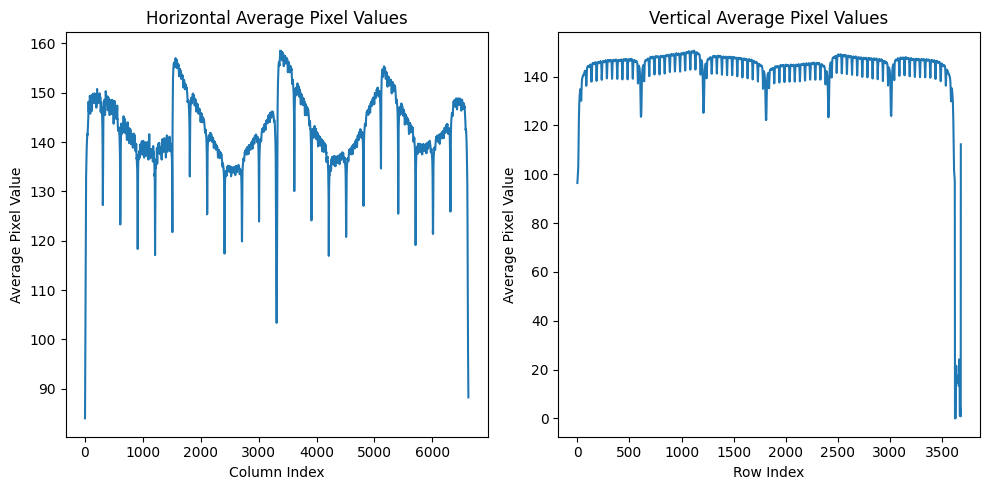

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = '/content/H06240200814994_240208230016.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Image not found!")
else:
    # Average pixel values horizontally (mean across rows)
    horizontal_avg = np.mean(image, axis=0)

    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Plot the distributions
    plt.figure(figsize=(10, 5))

    # Horizontal average plot
    plt.subplot(1, 2, 1)
    plt.plot(horizontal_avg)
    plt.title('Horizontal Average Pixel Values')
    plt.xlabel('Column Index')
    plt.ylabel('Average Pixel Value')

    # Vertical average plot
    plt.subplot(1, 2, 2)
    plt.plot(vertical_avg)
    plt.title('Vertical Average Pixel Values')
    plt.xlabel('Row Index')
    plt.ylabel('Average Pixel Value')

    # Show the plots
    plt.tight_layout()
    plt.show()


Minimum in range A: Value = 123.5030193236715, Index = 610
Minimum in range B: Value = 125.11669685990339, Index = 1210
Minimum in range C: Value = 122.27807971014492, Index = 1810
Minimum in range D: Value = 123.30631038647343, Index = 2410
Minimum in range E: Value = 123.93644323671498, Index = 3013
Minimum in range F: Value = 112.22992149758454, Index = 3681


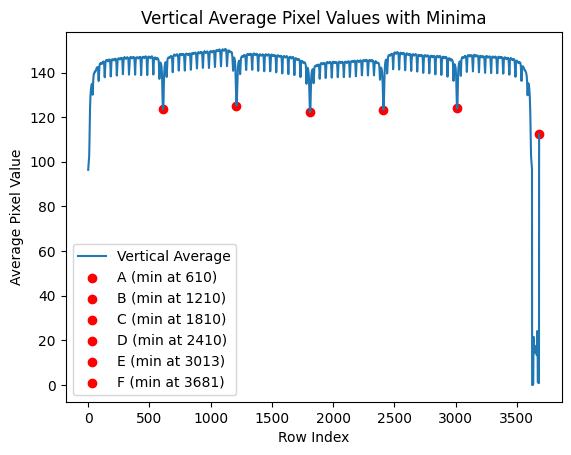

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = '/content/H06240200814994_240208230016.jpg'  # Change this to your PNG file path if needed
# image_path = '/content/preprocessed_image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Image not found!")
else:
    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]

    # Initialize a dictionary to store the results
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Also capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Print the results
    for label, (value, index) in min_values.items():
        print(f"Minimum in range {label.upper()}: Value = {value}, Index = {index}")

    # Plot the vertical average and mark the minimum points
    plt.plot(vertical_avg, label='Vertical Average')

    # Mark the minimum points
    for label, (value, index) in min_values.items():
        plt.scatter(index, value, label=f"{label.upper()} (min at {index})", color='red')

    # Add labels and legend
    plt.title('Vertical Average Pixel Values with Minima')
    plt.xlabel('Row Index')
    plt.ylabel('Average Pixel Value')
    plt.legend()

    # Show the plot
    plt.show()


Minimum in range A: Value = 123.58035714285714, Index = 602
Minimum in range B: Value = 125.17554479418887, Index = 1202
Minimum in range C: Value = 122.35638619854721, Index = 1802
Minimum in range D: Value = 123.37288135593221, Index = 2402
Minimum in range E: Value = 124.01029055690073, Index = 3005
Minimum in range F: Value = 101.6864406779661, Index = 3608


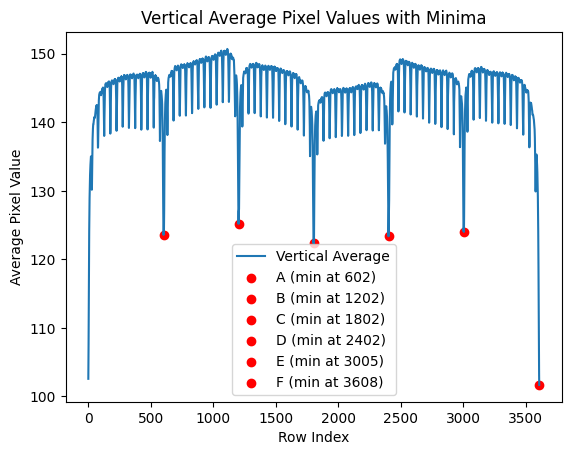

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
# image_path = '/content/H06240200814994_240208230016.jpg'  # Change this to your PNG file path if needed
image_path = '/content/preprocessed_image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Image not found!")
else:
    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]

    # Initialize a dictionary to store the results
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Also capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Print the results
    for label, (value, index) in min_values.items():
        print(f"Minimum in range {label.upper()}: Value = {value}, Index = {index}")

    # Plot the vertical average and mark the minimum points
    plt.plot(vertical_avg, label='Vertical Average')

    # Mark the minimum points
    for label, (value, index) in min_values.items():
        plt.scatter(index, value, label=f"{label.upper()} (min at {index})", color='red')

    # Add labels and legend
    plt.title('Vertical Average Pixel Values with Minima')
    plt.xlabel('Row Index')
    plt.ylabel('Average Pixel Value')
    plt.legend()

    # Show the plot
    plt.show()


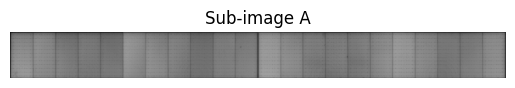

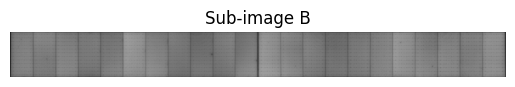

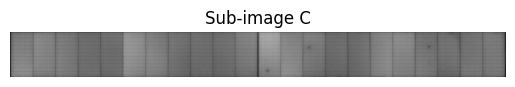

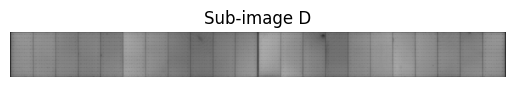

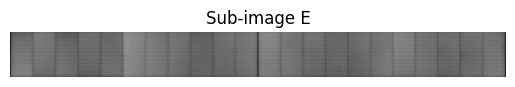

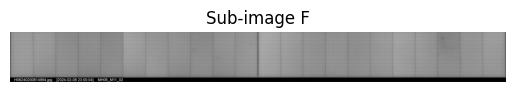

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = '/content/H06240200814994_240208230016.jpg'  # Change this to your PNG file path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Image not found!")
else:
    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges and corresponding labels
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Get the indices for splitting
    A = min_values['a'][1]
    B = min_values['b'][1]
    C = min_values['c'][1]
    D = min_values['d'][1]
    E = min_values['e'][1]
    F = len(vertical_avg) - 1  # Last index

    # Define sub-images
    sub_images = {
        'a': image[0:A, :],
        'b': image[A:B, :],
        'c': image[B:C, :],
        'd': image[C:D, :],
        'e': image[D:E, :],
        'f': image[E:F + 1, :]  # F + 1 to include the last row
    }

    # Save or display the sub-images
    for label, sub_image in sub_images.items():
        cv2.imwrite(f'sub_image_{label}.png', sub_image)  # Save the sub-image
        # Alternatively, display the sub-image
        plt.imshow(sub_image, cmap='gray')
        plt.title(f'Sub-image {label.upper()}')
        plt.axis('off')
        plt.show()


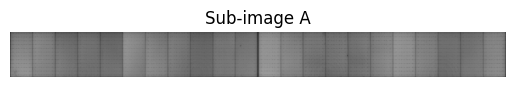

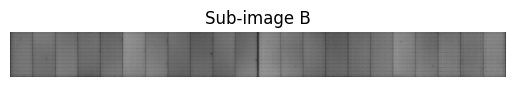

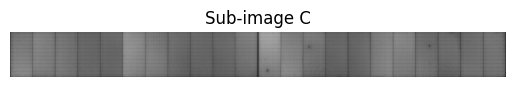

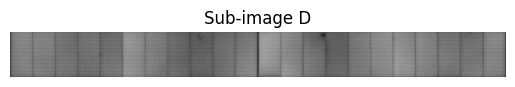

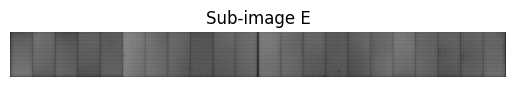

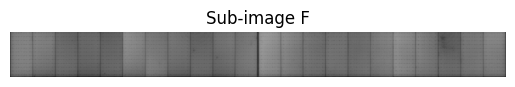

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = '/content/preprocessed_image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Image not found!")
else:
    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges and corresponding labels
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Get the indices for splitting
    A = min_values['a'][1]
    B = min_values['b'][1]
    C = min_values['c'][1]
    D = min_values['d'][1]
    E = min_values['e'][1]
    F = len(vertical_avg) - 1  # Last index

    # Define sub-images
    sub_images = {
        'a': image[0:A, :],
        'b': image[A:B, :],
        'c': image[B:C, :],
        'd': image[C:D, :],
        'e': image[D:E, :],
        'f': image[E:F + 1, :]  # F + 1 to include the last row
    }

    # Save or display the sub-images
    for label, sub_image in sub_images.items():
        cv2.imwrite(f'sub_image_{label}.png', sub_image)  # Save the sub-image
        # Alternatively, display the sub-image
        plt.imshow(sub_image, cmap='gray')
        plt.title(f'Sub-image {label.upper()}')
        plt.axis('off')
        plt.show()


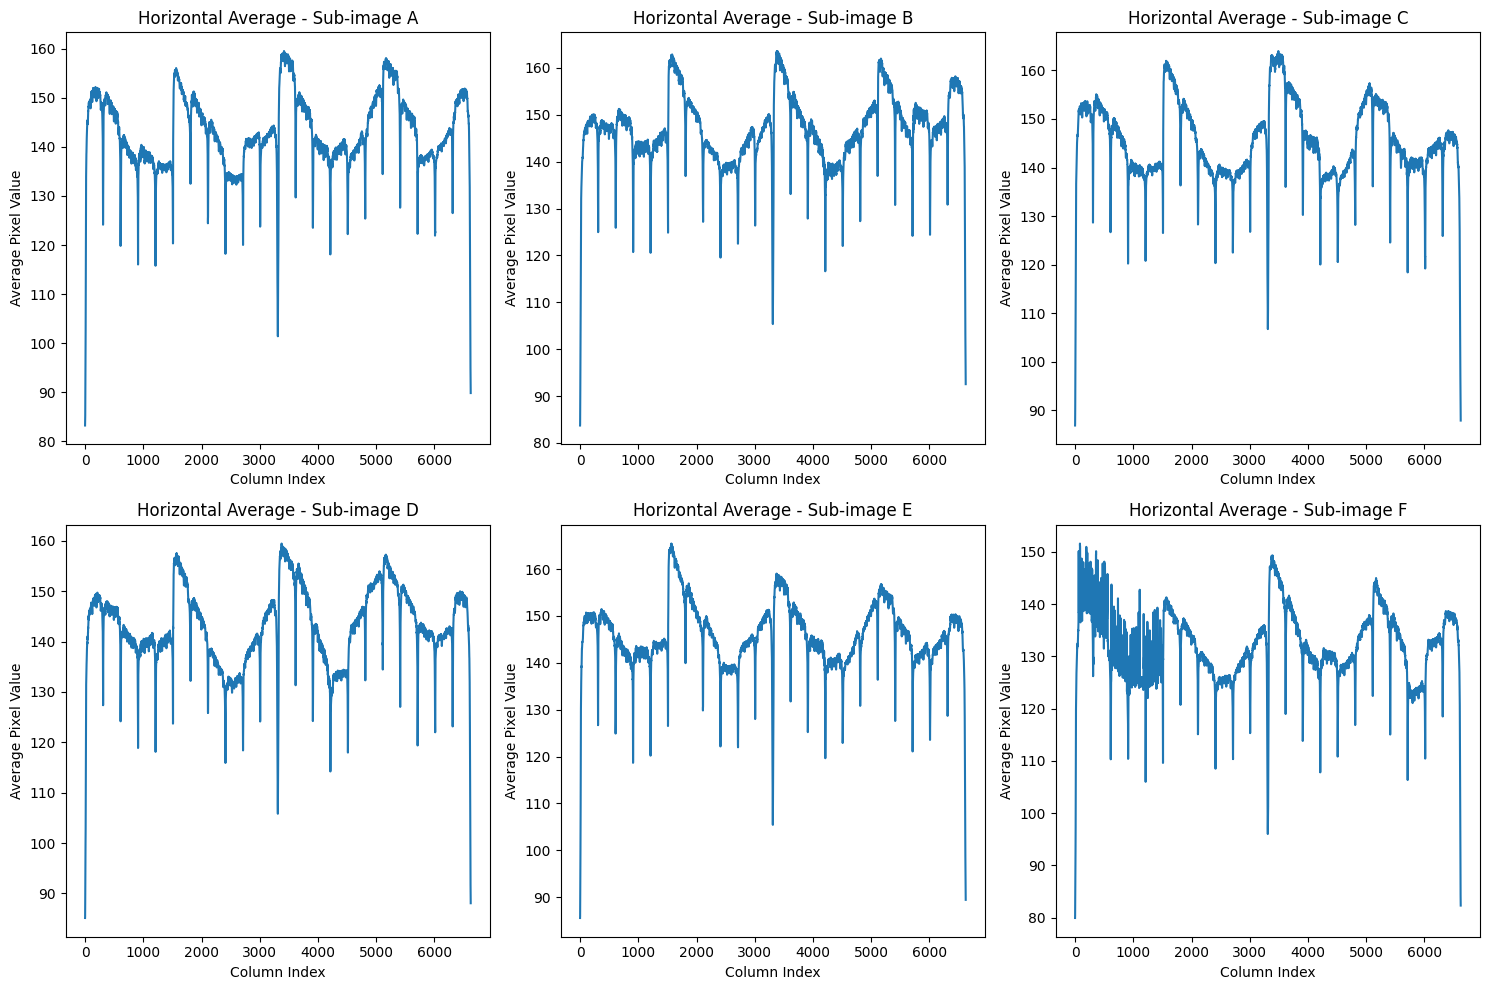

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = '/content/H06240200814994_240208230016.jpg'  # Change this to your PNG file path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Image not found!")
else:
    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges and corresponding labels
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Get the indices for splitting
    A = min_values['a'][1]
    B = min_values['b'][1]
    C = min_values['c'][1]
    D = min_values['d'][1]
    E = min_values['e'][1]
    F = len(vertical_avg) - 1  # Last index

    # Define sub-images
    sub_images = {
        'a': image[0:A, :],
        'b': image[A:B, :],
        'c': image[B:C, :],
        'd': image[C:D, :],
        'e': image[D:E, :],
        'f': image[E:F + 1, :]  # F + 1 to include the last row
    }

    # Plot horizontal average values for each sub-image
    plt.figure(figsize=(15, 10))

    for label, sub_image in sub_images.items():
        # Calculate the horizontal average along the columns
        horizontal_avg = np.mean(sub_image, axis=0)

        # Plotting
        plt.subplot(2, 3, ord(label) - 96)  # ord('a') = 97
        plt.plot(horizontal_avg)
        plt.title(f'Horizontal Average - Sub-image {label.upper()}')
        plt.xlabel('Column Index')
        plt.ylabel('Average Pixel Value')

    plt.tight_layout()
    plt.show()

    # Optionally, save the sub-images
    for label, sub_image in sub_images.items():
        cv2.imwrite(f'sub_image_{label}.png', sub_image)  # Save the sub-image


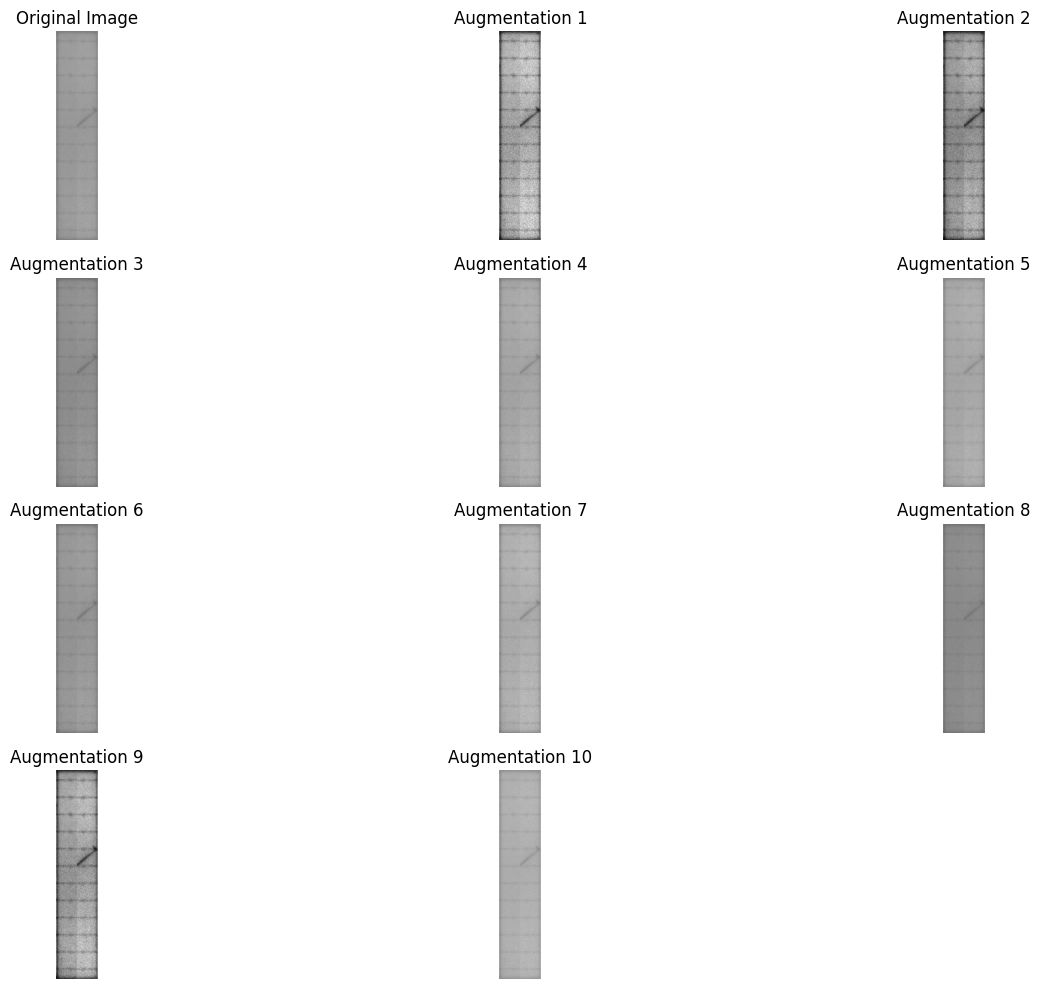

In [ ]:
# prompt: give me code to see some augmented images from this code, given an input image
#         also plot original and 10  different augmentations
#         self.include_brightness_contrast = include_brightness_contrast
#         self.include_jitter = include_jitter
#         self.jitter = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, h

from google.colab import drive
import pandas as pd
import cv2
import numpy as np
import os
from tqdm import tqdm
import shutil
from PIL import Image
import zipfile
import matplotlib.pyplot as plt
from torchvision import transforms

def augment_image(image_path, include_brightness_contrast=True, include_jitter=True):
    """
    Augments an image using brightness/contrast and color jitter.
    """

    image = Image.open(image_path).convert("RGB")  # Ensure it's RGB

    augmentations = []
    augmentations.append(transforms.ToTensor())

    if include_brightness_contrast:
        augmentations.append(transforms.RandomAdjustSharpness(sharpness_factor=2))
        augmentations.append(transforms.RandomAutocontrast())
    if include_jitter:
        augmentations.append(transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1))

    transform = transforms.Compose(augmentations)

    augmented_images = []
    for _ in range(10):
        augmented_images.append(transform(image))

    return image, augmented_images


def plot_augmentations(original_image, augmented_images):
    """
    Plots the original image and its augmentations.
    """
    plt.figure(figsize=(15, 10))

    # Plot the original image
    plt.subplot(4, 3, 1)
    plt.imshow(np.array(original_image))
    plt.title("Original Image")
    plt.axis("off")

    # Plot the augmented images
    for i, augmented_image in enumerate(augmented_images):
        plt.subplot(4, 3, i + 2)
        plt.imshow(np.transpose(augmented_image.numpy(), (1, 2, 0)))  # Convert to numpy and transpose
        plt.title(f"Augmentation {i + 1}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# Example usage
image_path = '/content/sub_image_d5.png'  # Replace with your image path
original_image, augmented_images = augment_image(image_path)
plot_augmentations(original_image, augmented_images)


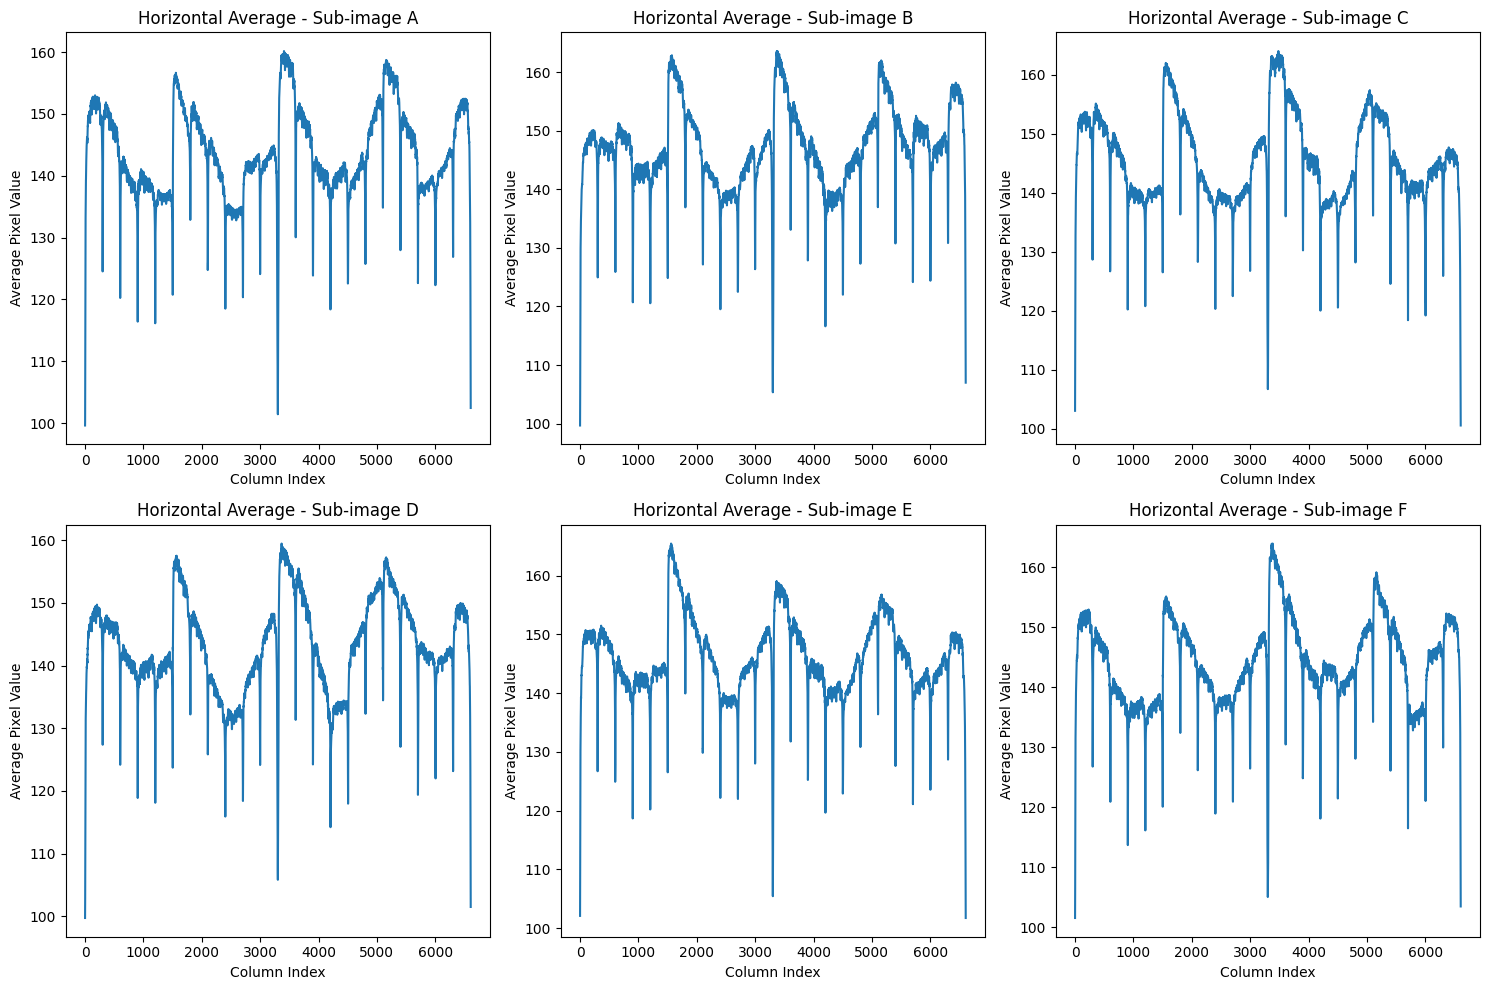

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path ='/content/preprocessed_image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Image not found!")
else:
    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges and corresponding labels
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Get the indices for splitting
    A = min_values['a'][1]
    B = min_values['b'][1]
    C = min_values['c'][1]
    D = min_values['d'][1]
    E = min_values['e'][1]
    F = len(vertical_avg) - 1  # Last index

    # Define sub-images
    sub_images = {
        'a': image[0:A, :],
        'b': image[A:B, :],
        'c': image[B:C, :],
        'd': image[C:D, :],
        'e': image[D:E, :],
        'f': image[E:F + 1, :]  # F + 1 to include the last row
    }

    # Plot horizontal average values for each sub-image
    plt.figure(figsize=(15, 10))

    for label, sub_image in sub_images.items():
        # Calculate the horizontal average along the columns
        horizontal_avg = np.mean(sub_image, axis=0)

        # Plotting
        plt.subplot(2, 3, ord(label) - 96)  # ord('a') = 97
        plt.plot(horizontal_avg)
        plt.title(f'Horizontal Average - Sub-image {label.upper()}')
        plt.xlabel('Column Index')
        plt.ylabel('Average Pixel Value')

    plt.tight_layout()
    plt.show()

    # Optionally, save the sub-images
    for label, sub_image in sub_images.items():
        cv2.imwrite(f'sub_image_{label}.png', sub_image)  # Save the sub-image


In [ ]:
    vertical_lines_ranges = [
        (0, 15),  # First edge (near left of image)
        (300, 325), (600, 625), (900, 925), (1200, 1225), (1500, 1525), (1800, 1825),
        (2100, 2125), (2400, 2425), (2700, 2725), (3000, 3025), (3295, 3335), (3605, 3630),
        (3905, 3930), (4205, 4230), (4500, 4525), (4805, 4825), (5105, 5125),
        (5405, 5425), (5705, 5725), (6000, 6025), (6300, 6325),
        (6600, image.shape[1])  # Last edge (near right of image)
    ]

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = '/content/H06240200814994_240208230016.jpg'  # Change this to your PNG file path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Image not found!")
else:
    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges and corresponding labels
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Get the indices for splitting
    A = min_values['a'][1]
    B = min_values['b'][1]
    C = min_values['c'][1]
    D = min_values['d'][1]
    E = min_values['e'][1]
    F = len(vertical_avg) - 1  # Last index

    # Define sub-images
    sub_images = {
        'a': image[0:A, :],
        'b': image[A:B, :],
        'c': image[B:C, :],
        'd': image[C:D, :],
        'e': image[D:E, :],
        'f': image[E:F + 1, :]  # F + 1 to include the last row
    }

    # Function to find minimum values in specified ranges
    def find_min_points(horizontal_avg, name_prefix):
        points = {}
        ranges = [
            (0, 0),  # point 0 at pixel 0
            (250, 350), (550, 650), (850, 950), (1150, 1250),
            (1450, 1550), (1750, 1850), (2050, 2150), (2350, 2450),
            (2650, 2750), (2950, 3050), (3250, 3350), (3550, 3650),
            (3850, 3950), (4150, 4250), (4450, 4550), (4750, 4850),
            (5050, 5150), (5350, 5450), (5650, 5750), (5950, 6050),
            (6050, 6150), (6350, 6450), (0, len(horizontal_avg) - 1)  # last pixel
        ]

        for i, (start, end) in enumerate(ranges):
            if i == 0:  # point 0
                points[f'{name_prefix}_0'] = (0, 0)  # Return as a tuple
            elif start < len(horizontal_avg):  # Check if the start is within the array
                min_val = np.min(horizontal_avg[start:end + 1]) if end < len(horizontal_avg) else np.min(horizontal_avg[start:])
                min_idx = np.argmin(horizontal_avg[start:end + 1]) + start if end < len(horizontal_avg) else np.argmin(horizontal_avg[start:]) + start
                points[f'{name_prefix}_{i}'] = (min_val, min_idx)

        return points

    # Find points for each sub-image
    all_points = {}
    for label, sub_image in sub_images.items():
        horizontal_avg = np.mean(sub_image, axis=0)
        all_points[label] = find_min_points(horizontal_avg, label)

    # Print the results
    for label, points in all_points.items():
        for point_name, (value, index) in points.items():
            print(f"{point_name} in sub-image {label.upper()}: Value = {value}, Index = {index}")

    # Optionally, save the sub-images
    for label, sub_image in sub_images.items():
        cv2.imwrite(f'sub_image_{label}.png', sub_image)  # Save the sub-image


a_0 in sub-image A: Value = 0, Index = 0
a_1 in sub-image A: Value = 124.14098360655737, Index = 309
a_2 in sub-image A: Value = 119.82295081967213, Index = 610
a_3 in sub-image A: Value = 116.0344262295082, Index = 910
a_4 in sub-image A: Value = 115.77704918032786, Index = 1210
a_5 in sub-image A: Value = 120.32786885245902, Index = 1510
a_6 in sub-image A: Value = 132.48852459016393, Index = 1811
a_7 in sub-image A: Value = 124.4311475409836, Index = 2110
a_8 in sub-image A: Value = 118.20655737704918, Index = 2411
a_9 in sub-image A: Value = 120.01475409836065, Index = 2713
a_10 in sub-image A: Value = 123.74918032786886, Index = 3007
a_11 in sub-image A: Value = 101.40163934426229, Index = 3311
a_12 in sub-image A: Value = 129.69672131147541, Index = 3617
a_13 in sub-image A: Value = 123.50819672131148, Index = 3913
a_14 in sub-image A: Value = 118.08524590163934, Index = 4212
a_15 in sub-image A: Value = 122.22131147540983, Index = 4511
a_16 in sub-image A: Value = 125.3803278688

Points in Sub-image A:
  a_1: Value = 124.14098360655737, Index = 309
  a_2: Value = 119.82295081967213, Index = 610
  a_3: Value = 116.0344262295082, Index = 910
  a_4: Value = 115.77704918032786, Index = 1210
  a_5: Value = 120.32786885245902, Index = 1510
  a_6: Value = 132.48852459016393, Index = 1811
  a_7: Value = 124.4311475409836, Index = 2110
  a_8: Value = 118.20655737704918, Index = 2411
  a_9: Value = 120.01475409836065, Index = 2713
  a_10: Value = 123.74918032786886, Index = 3007
  a_11: Value = 101.40163934426229, Index = 3311
  a_12: Value = 129.69672131147541, Index = 3617
  a_13: Value = 123.50819672131148, Index = 3913
  a_14: Value = 118.08524590163934, Index = 4212
  a_15: Value = 122.22131147540983, Index = 4511
  a_16: Value = 125.38032786885246, Index = 4811
  a_17: Value = 134.45573770491802, Index = 5111
  a_18: Value = 127.60819672131147, Index = 5411
  a_19: Value = 122.27704918032786, Index = 5711
  a_20: Value = 121.91475409836066, Index = 6010
  a_21: Val

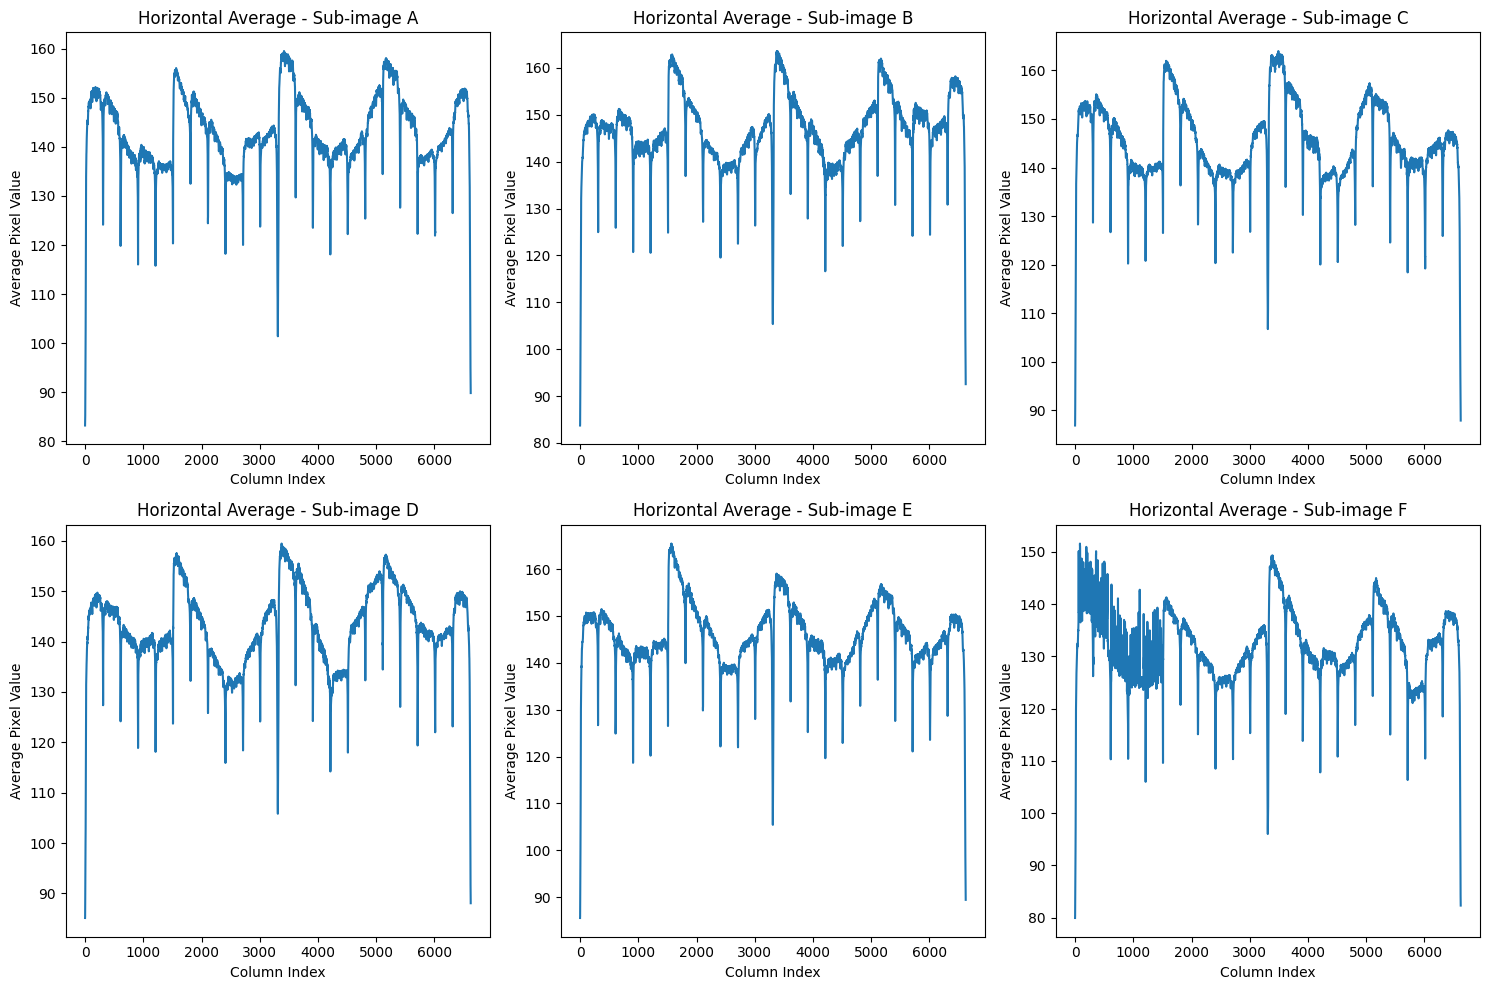

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = '/content/H06240200814994_240208230016.jpg'  # Change this to your PNG file path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Image not found!")
else:
    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges and corresponding labels
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Get the indices for splitting
    A = min_values['a'][1]
    B = min_values['b'][1]
    C = min_values['c'][1]
    D = min_values['d'][1]
    E = min_values['e'][1]
    F = len(vertical_avg) - 1  # Last index

    # Define sub-images
    sub_images = {
        'a': image[0:A, :],
        'b': image[A:B, :],
        'c': image[B:C, :],
        'd': image[C:D, :],
        'e': image[D:E, :],
        'f': image[E:F + 1, :]  # F + 1 to include the last row
    }

    # Define ranges for points in sub-image a
    point_ranges = [
        (250, 350), (550, 650), (850, 950), (1150, 1250),
        (1450, 1550), (1750, 1850), (2050, 2150), (2350, 2450),
        (2650, 2750), (2950, 3050), (3250, 3350), (3550, 3650),
        (3850, 3950), (4150, 4250), (4450, 4550), (4750, 4850),
        (5050, 5150), (5350, 5450), (5650, 5750), (5950, 6050),
        (6250, 6400)
    ]

    # Calculate and store minimum values for each sub-image
    all_points = {}

    for label, sub_image in sub_images.items():
        horizontal_avg = np.mean(sub_image, axis=0)
        points = {}

        for idx, (start, end) in enumerate(point_ranges):
            min_val = np.min(horizontal_avg[start:end + 1])
            min_idx = np.argmin(horizontal_avg[start:end + 1]) + start
            points[f'{label}_{idx + 1}'] = (min_val, min_idx)

        # Last point for each sub-image
        points[f'{label}_22'] = (horizontal_avg[-1], len(horizontal_avg) - 1)

        # Store results
        all_points[label] = points

    # Print the points found in each sub-image
    for label, points in all_points.items():
        print(f"Points in Sub-image {label.upper()}:")
        for point_name, (value, index) in points.items():
            print(f"  {point_name}: Value = {value}, Index = {index}")

    # Plot horizontal average values for each sub-image
    plt.figure(figsize=(15, 10))

    for label, sub_image in sub_images.items():
        # Calculate the horizontal average along the columns
        horizontal_avg = np.mean(sub_image, axis=0)

        # Plotting
        plt.subplot(2, 3, ord(label) - 96)  # ord('a') = 97
        plt.plot(horizontal_avg)
        plt.title(f'Horizontal Average - Sub-image {label.upper()}')
        plt.xlabel('Column Index')
        plt.ylabel('Average Pixel Value')

    plt.tight_layout()
    plt.show()

    # Optionally, save the sub-images
    for label, sub_image in sub_images.items():
        cv2.imwrite(f'sub_image_{label}.png', sub_image)  # Save the sub-image


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = '/content/H06240200814994_240208230016.jpg'  # Change this to your PNG file path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Image not found!")
else:
    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges and corresponding labels
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Get the indices for splitting
    A = min_values['a'][1]
    B = min_values['b'][1]
    C = min_values['c'][1]
    D = min_values['d'][1]
    E = min_values['e'][1]
    F = len(vertical_avg) - 1  # Last index

    # Define sub-images
    sub_images = {
        'a': image[0:A, :],
        'b': image[A:B, :],
        'c': image[B:C, :],
        'd': image[C:D, :],
        'e': image[D:E, :],
        'f': image[E:F + 1, :]  # F + 1 to include the last row
    }

    # Define ranges for points in sub-image a
    point_ranges = [
        (250, 350), (550, 650), (850, 950), (1150, 1250),
        (1450, 1550), (1750, 1850), (2050, 2150), (2350, 2450),
        (2650, 2750), (2950, 3050), (3250, 3350), (3550, 3650),
        (3850, 3950), (4150, 4250), (4450, 4550), (4750, 4850),
        (5050, 5150), (5350, 5450), (5650, 5750), (5950, 6050),
        (6250, 6400)
    ]

    # Calculate and store minimum values for each sub-image
    all_points = {}

    for label, sub_image in sub_images.items():
        horizontal_avg = np.mean(sub_image, axis=0)
        points = {}

        for idx, (start, end) in enumerate(point_ranges):
            min_val = np.min(horizontal_avg[start:end + 1])
            min_idx = np.argmin(horizontal_avg[start:end + 1]) + start
            points[f'{label}_{idx + 1}'] = (min_val, min_idx)

        # Last point for each sub-image
        points[f'{label}_22'] = (horizontal_avg[-1], len(horizontal_avg) - 1)

        # Store results
        all_points[label] = points

    # Split each sub-image into further sub-images
    final_sub_images = {}
    for label, points in all_points.items():
        sub_image = sub_images[label]
        indices = [points[f'{label}_{i}'][1] for i in range(1, 23)]  # Get indices for points a_1 to a_22
        indices = [0] + indices  # Include the starting point

        # Create sub-images based on the points
        for i in range(len(indices) - 1):
            sub_img = sub_image[:, indices[i]:indices[i + 1]]  # Extract the sub-image
            final_sub_images[f'sub_image_{label}{i + 1}'] = sub_img

    # Print the names of the created sub-images
    print("Created sub-images:")
    for name in final_sub_images.keys():
        print(name)

    # Optionally, save the final sub-images
    for name, sub_image in final_sub_images.items():
        cv2.imwrite(f'{name}.png', sub_image)  # Save the sub-image




Created sub-images:
sub_image_a1
sub_image_a2
sub_image_a3
sub_image_a4
sub_image_a5
sub_image_a6
sub_image_a7
sub_image_a8
sub_image_a9
sub_image_a10
sub_image_a11
sub_image_a12
sub_image_a13
sub_image_a14
sub_image_a15
sub_image_a16
sub_image_a17
sub_image_a18
sub_image_a19
sub_image_a20
sub_image_a21
sub_image_a22
sub_image_b1
sub_image_b2
sub_image_b3
sub_image_b4
sub_image_b5
sub_image_b6
sub_image_b7
sub_image_b8
sub_image_b9
sub_image_b10
sub_image_b11
sub_image_b12
sub_image_b13
sub_image_b14
sub_image_b15
sub_image_b16
sub_image_b17
sub_image_b18
sub_image_b19
sub_image_b20
sub_image_b21
sub_image_b22
sub_image_c1
sub_image_c2
sub_image_c3
sub_image_c4
sub_image_c5
sub_image_c6
sub_image_c7
sub_image_c8
sub_image_c9
sub_image_c10
sub_image_c11
sub_image_c12
sub_image_c13
sub_image_c14
sub_image_c15
sub_image_c16
sub_image_c17
sub_image_c18
sub_image_c19
sub_image_c20
sub_image_c21
sub_image_c22
sub_image_d1
sub_image_d2
sub_image_d3
sub_image_d4
sub_image_d5
sub_image_d6
sub_i

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the grayscale image
image_path = '/content/H06240200814994_240208230016.jpg'  # Change this to your PNG file path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Image not found!")
else:
    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges and corresponding labels
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Get the indices for splitting
    A = min_values['a'][1]
    B = min_values['b'][1]
    C = min_values['c'][1]
    D = min_values['d'][1]
    E = min_values['e'][1]
    F = len(vertical_avg) - 1  # Last index

    # Define sub-images
    sub_images = {
        'a': image[0:A, :],
        'b': image[A:B, :],
        'c': image[B:C, :],
        'd': image[C:D, :],
        'e': image[D:E, :],
        'f': image[E:F + 1, :]  # F + 1 to include the last row
    }

    # Define ranges for points in sub-image a
    point_ranges = [
        (250, 350), (550, 650), (850, 950), (1150, 1250),
        (1450, 1550), (1750, 1850), (2050, 2150), (2350, 2450),
        (2650, 2750), (2950, 3050), (3250, 3350), (3550, 3650),
        (3850, 3950), (4150, 4250), (4450, 4550), (4750, 4850),
        (5050, 5150), (5350, 5450), (5650, 5750), (5950, 6050),
        (6250, 6400)
    ]

    # Calculate and store minimum values for each sub-image
    all_points = {}

    for label, sub_image in sub_images.items():
        horizontal_avg = np.mean(sub_image, axis=0)
        points = {}

        for idx, (start, end) in enumerate(point_ranges):
            min_val = np.min(horizontal_avg[start:end + 1])
            min_idx = np.argmin(horizontal_avg[start:end + 1]) + start
            points[f'{label}_{idx + 1}'] = (min_val, min_idx)

        # Last point for each sub-image
        points[f'{label}_22'] = (horizontal_avg[-1], len(horizontal_avg) - 1)

        # Store results
        all_points[label] = points

    # Split each sub-image into further sub-images
    final_sub_images = {}
    padding = 4  # Padding of 3 pixels on both sides
    for label, points in all_points.items():
        sub_image = sub_images[label]
        indices = [points[f'{label}_{i}'][1] for i in range(1, 23)]  # Get indices for points a_1 to a_22
        indices = [0] + indices + [sub_image.shape[1]]  # Include the starting point and end of image

        # Create sub-images based on the points with padding
        for i in range(len(indices) - 1):
            start_idx = max(indices[i] - padding, 0)  # Apply padding
            end_idx = min(indices[i + 1] + padding, sub_image.shape[1])  # Apply padding
            sub_img = sub_image[:, start_idx:end_idx]  # Extract the sub-image
            final_sub_images[f'sub_image_{label}{i + 1}'] = sub_img

    # Print the names of the created sub-images
    print("Created sub-images:")
    for name in final_sub_images.keys():
        print(name)

    # Optionally, save the final sub-images
    for name, sub_image in final_sub_images.items():
        cv2.imwrite(f'{name}.png', sub_image)  # Save the sub-image

 # Create a DataFrame to show the distribution of extracted sub-image sizes
    sub_image_sizes = {name: sub_img.shape for name, sub_img in final_sub_images.items()}
    size_data = {
        'Sub-image': list(sub_image_sizes.keys()),
        'Height': [size[0] for size in sub_image_sizes.values()],
        'Width': [size[1] for size in sub_image_sizes.values()]
    }
    size_df = pd.DataFrame(size_data)

    # Display the DataFrame
    print("\nSub-image Sizes Distribution:")
    print(size_df)

    # Optionally, save the final sub-images
    for name, sub_image in final_sub_images.items():
        cv2.imwrite(f'{name}.png', sub_image)  # Save the sub-image



Created sub-images:
sub_image_a1
sub_image_a2
sub_image_a3
sub_image_a4
sub_image_a5
sub_image_a6
sub_image_a7
sub_image_a8
sub_image_a9
sub_image_a10
sub_image_a11
sub_image_a12
sub_image_a13
sub_image_a14
sub_image_a15
sub_image_a16
sub_image_a17
sub_image_a18
sub_image_a19
sub_image_a20
sub_image_a21
sub_image_a22
sub_image_a23
sub_image_b1
sub_image_b2
sub_image_b3
sub_image_b4
sub_image_b5
sub_image_b6
sub_image_b7
sub_image_b8
sub_image_b9
sub_image_b10
sub_image_b11
sub_image_b12
sub_image_b13
sub_image_b14
sub_image_b15
sub_image_b16
sub_image_b17
sub_image_b18
sub_image_b19
sub_image_b20
sub_image_b21
sub_image_b22
sub_image_b23
sub_image_c1
sub_image_c2
sub_image_c3
sub_image_c4
sub_image_c5
sub_image_c6
sub_image_c7
sub_image_c8
sub_image_c9
sub_image_c10
sub_image_c11
sub_image_c12
sub_image_c13
sub_image_c14
sub_image_c15
sub_image_c16
sub_image_c17
sub_image_c18
sub_image_c19
sub_image_c20
sub_image_c21
sub_image_c22
sub_image_c23
sub_image_d1
sub_image_d2
sub_image_d3
su

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the grayscale image
image_path = '/content/preprocessed_image.png'  # Change this to your PNG file path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Image not found!")
else:
    # Average pixel values vertically (mean across columns)
    vertical_avg = np.mean(image, axis=1)

    # Define the ranges and corresponding labels
    ranges = [(500, 700), (1100, 1300), (1700, 1900), (2300, 2500), (2900, 3100)]
    min_values = {}

    # Find the minimum value in each range
    for i, (start, end) in enumerate(ranges):
        min_val = np.min(vertical_avg[start:end + 1])
        min_idx = np.argmin(vertical_avg[start:end + 1]) + start
        min_values[chr(97 + i)] = (min_val, min_idx)  # chr(97) = 'a'

    # Capture the last pixel as 'f'
    min_values['f'] = (vertical_avg[-1], len(vertical_avg) - 1)

    # Get the indices for splitting
    A = min_values['a'][1]
    B = min_values['b'][1]
    C = min_values['c'][1]
    D = min_values['d'][1]
    E = min_values['e'][1]
    F = len(vertical_avg) - 1  # Last index

    # Define sub-images
    sub_images = {
        'a': image[0:A, :],
        'b': image[A:B, :],
        'c': image[B:C, :],
        'd': image[C:D, :],
        'e': image[D:E, :],
        'f': image[E:F + 1, :]  # F + 1 to include the last row
    }

    # Define ranges for points in sub-image a
    point_ranges = [
        (250, 350), (550, 650), (850, 950), (1150, 1250),
        (1450, 1550), (1750, 1850), (2050, 2150), (2350, 2450),
        (2650, 2750), (2950, 3050), (3250, 3350), (3550, 3650),
        (3850, 3950), (4150, 4250), (4450, 4550), (4750, 4850),
        (5050, 5150), (5350, 5450), (5650, 5750), (5950, 6050),
        (6250, 6400)
    ]

    # Calculate and store minimum values for each sub-image
    all_points = {}

    for label, sub_image in sub_images.items():
        horizontal_avg = np.mean(sub_image, axis=0)
        points = {}

        for idx, (start, end) in enumerate(point_ranges):
            min_val = np.min(horizontal_avg[start:end + 1])
            min_idx = np.argmin(horizontal_avg[start:end + 1]) + start
            points[f'{label}_{idx + 1}'] = (min_val, min_idx)

        # Last point for each sub-image
        points[f'{label}_22'] = (horizontal_avg[-1], len(horizontal_avg) - 1)

        # Store results
        all_points[label] = points

    # Split each sub-image into further sub-images
    final_sub_images = {}
    padding = 3  # Padding of 3 pixels on both sides
    for label, points in all_points.items():
        sub_image = sub_images[label]
        indices = [points[f'{label}_{i}'][1] for i in range(1, 23)]  # Get indices for points a_1 to a_22
        indices = [0] + indices + [sub_image.shape[1]]  # Include the starting point and end of image

        # Create sub-images based on the points with padding
        for i in range(len(indices) - 1):
            if i < 22:  # Ensure only sub-image 1 to 22 are created
                start_idx = max(indices[i] - padding, 0)  # Apply padding
                end_idx = min(indices[i + 1] + padding, sub_image.shape[1])  # Apply padding
                sub_img = sub_image[:, start_idx:end_idx]  # Extract the sub-image
                final_sub_images[f'sub_image_{label}{i + 1}'] = sub_img

    # Print the names of the created sub-images
    print("Created sub-images:")
    for name in final_sub_images.keys():
        print(name)

    # Create a DataFrame to show the distribution of extracted sub-image sizes
    sub_image_sizes = {name: sub_img.shape for name, sub_img in final_sub_images.items()}
    size_data = {
        'Sub-image': list(sub_image_sizes.keys()),
        'Height': [size[0] for size in sub_image_sizes.values()],
        'Width': [size[1] for size in sub_image_sizes.values()]
    }
    size_df = pd.DataFrame(size_data)

    # Display the DataFrame
    print("\nSub-image Sizes Distribution:")
    print(size_df)


Created sub-images:
sub_image_a1
sub_image_a2
sub_image_a3
sub_image_a4
sub_image_a5
sub_image_a6
sub_image_a7
sub_image_a8
sub_image_a9
sub_image_a10
sub_image_a11
sub_image_a12
sub_image_a13
sub_image_a14
sub_image_a15
sub_image_a16
sub_image_a17
sub_image_a18
sub_image_a19
sub_image_a20
sub_image_a21
sub_image_a22
sub_image_b1
sub_image_b2
sub_image_b3
sub_image_b4
sub_image_b5
sub_image_b6
sub_image_b7
sub_image_b8
sub_image_b9
sub_image_b10
sub_image_b11
sub_image_b12
sub_image_b13
sub_image_b14
sub_image_b15
sub_image_b16
sub_image_b17
sub_image_b18
sub_image_b19
sub_image_b20
sub_image_b21
sub_image_b22
sub_image_c1
sub_image_c2
sub_image_c3
sub_image_c4
sub_image_c5
sub_image_c6
sub_image_c7
sub_image_c8
sub_image_c9
sub_image_c10
sub_image_c11
sub_image_c12
sub_image_c13
sub_image_c14
sub_image_c15
sub_image_c16
sub_image_c17
sub_image_c18
sub_image_c19
sub_image_c20
sub_image_c21
sub_image_c22
sub_image_d1
sub_image_d2
sub_image_d3
sub_image_d4
sub_image_d5
sub_image_d6
sub_i

In [ ]:
size_df

,Sub-image,Height,Width
0,sub_image_a1,602,304
1,sub_image_a2,602,307
2,sub_image_a3,602,306
3,sub_image_a4,602,306
4,sub_image_a5,602,306
...,...,...,...
127,sub_image_f18,604,305
128,sub_image_f19,604,306
129,sub_image_f20,604,307
130,sub_image_f21,604,307


In [ ]:
# Group by size to see how many of each size exist
size_df['Size'] = size_df['Height'].astype(str) + ' x ' + size_df['Width'].astype(str)
size_distribution = size_df.groupby('Size').size().reset_index(name='Count')

# Display the size distribution
print("\nSub-image Sizes Distribution:")
(size_distribution)


Sub-image Sizes Distribution:


,Size,Count
0,600 x 300,2
1,600 x 301,1
2,600 x 302,1
3,600 x 303,3
4,600 x 304,1
5,600 x 305,16
6,600 x 306,14
7,600 x 307,17
8,600 x 308,5
9,600 x 310,3


In [ ]:
import os
import pandas as pd

# Define paths
root_path = '/content/drive/MyDrive/Challenge 5 - Micro Cracks'

# Initialize list for storing rows
data = []

# Iterate over each subfolder
for subfolder in os.listdir(root_path):
    subfolder_path = os.path.join(root_path, subfolder)

    if os.path.isdir(subfolder_path):
        # Iterate over each image in the subfolder
        for image_name in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_name)

            # Set label to 0 as default
            label = 0

            # Initialize the row with image name, subfolder name, and label
            row = {
                'image_name': image_name,
                'subfolder_name': subfolder,
                'label': label
            }

            # Add 132 columns (a1, a2, ..., f32) with default value 0
            for letter in ['a', 'b', 'c', 'd', 'e', 'f']:
                for i in range(1, 33):
                    row[f'{letter}{i}'] = 0  # Default value set to 0

            # Append row to data
            data.append(row)

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Save DataFrame to CSV
output_csv_path = '/content/drive/MyDrive/output_micro_cracks_data.csv'
df.to_csv(output_csv_path, index=False)

print(f"CSV created at {output_csv_path}")


CSV created at /content/drive/MyDrive/output_micro_cracks_data.csv


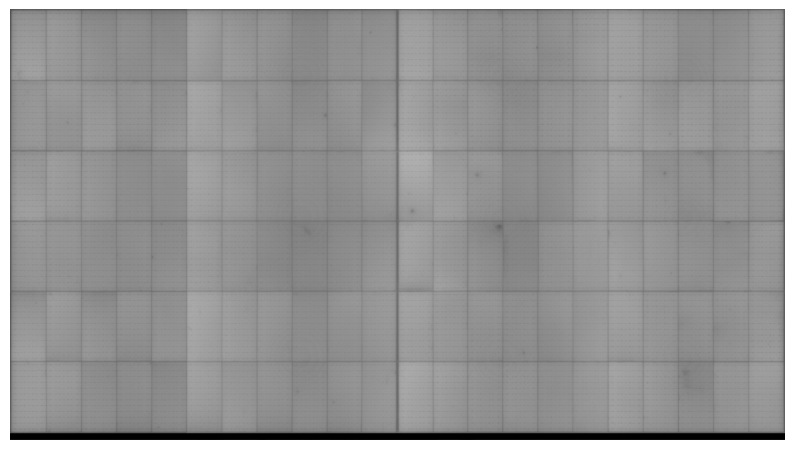

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def extract_and_plot_sub_images(image_path, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not open or find the image {image_path}.")
        return

    # Convert the image to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect edges using Canny
    edges = cv2.Canny(image_gray, 30, 40)
    edges = edges[:-50, :]  # Remove bottom part if needed

    # Detect lines using Hough Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 280)  # Adjust as necessary

    horizontal_lines = []
    vertical_lines = []

    # Set angle tolerance
    angle_tolerance = 0.005

    # Sort lines into horizontal and vertical based on angle
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            if np.pi / 2 - angle_tolerance <= theta <= np.pi / 2 + angle_tolerance:
                vertical_lines.append((rho, theta))
            elif theta <= angle_tolerance or np.pi - angle_tolerance <= theta <= np.pi + angle_tolerance:
                horizontal_lines.append((rho, theta))

    # Average nearby lines
    def average_nearby_lines(lines, distance_threshold=150):
        if not lines:
            return []
        lines.sort(key=lambda x: x[0])
        averaged_lines = []
        current_group = [lines[0]]
        for i in range(1, len(lines)):
            if abs(lines[i][0] - current_group[-1][0]) < distance_threshold:
                current_group.append(lines[i])
            else:
                avg_rho = np.mean([line[0] for line in current_group])
                avg_theta = np.mean([line[1] for line in current_group])
                averaged_lines.append((avg_rho, avg_theta))
                current_group = [lines[i]]
        if current_group:
            avg_rho = np.mean([line[0] for line in current_group])
            avg_theta = np.mean([line[1] for line in current_group])
            averaged_lines.append((avg_rho, avg_theta))
        return averaged_lines

    horizontal_lines = average_nearby_lines(horizontal_lines)
    vertical_lines = average_nearby_lines(vertical_lines)

    # Sort the lines based on their rho values
    horizontal_lines.sort(key=lambda x: x[0])
    vertical_lines.sort(key=lambda x: x[0])

    # Padding size
    padding = 10

    # Plot the original image with detected lines
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Loop through all pairs of horizontal and vertical lines to extract sub-images
    for i in range(len(horizontal_lines) - 1):
        for j in range(len(vertical_lines) - 1):
            # Get the two horizontal lines that form the top and bottom of the rectangle
            rho1_h, _ = horizontal_lines[i]
            rho2_h, _ = horizontal_lines[i + 1]

            # Get the two vertical lines that form the left and right of the rectangle
            rho1_v, _ = vertical_lines[j]
            rho2_v, _ = vertical_lines[j + 1]

            # Calculate the coordinates of the rectangle
            y1, x1 = int(rho1_v), int(rho1_h)
            y2, x2 = int(rho2_v), int(rho2_h)

            # Pad the coordinates
            x1, y1, x2, y2 = max(0, x1 - padding), max(0, y1 - padding), min(image.shape[1], x2 + padding), min(image.shape[0], y2 + padding)

            # Extract the sub-image
            sub_image = image[y1:y2, x1:x2]

            # Save the sub-image
            output_filename = os.path.join(output_dir, f"rectangle_{i}_{j}.jpg")
            cv2.imwrite(output_filename, sub_image)

            # Plot rectangle on the original image
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, edgecolor='red', facecolor='none', linewidth=2))

            print(f"Saved rectangle area as {output_filename}")

    # Show the plot with rectangles
    plt.show()

# Example usage
image_path = '/content/H06240200814994_240208230016_processed (1).jpg'
 # Path to your image
output_folder = '/content/Untitled Folder'
# output_dir = output_folder   # Folder to save sub-images

# Extract solar cells using edge detection and dynamic cropping
# extract_solar_cells(image_path, root_folder)

# Example usage:
# image_path = '/path/to/your/image.jpg'
# root_folder = '/path/to/output/folder'
extract_and_plot_sub_images(image_path, output_folder)


In [ ]:
import cv2
import numpy as np


# Function to average nearby lines
def average_nearby_lines(lines, distance_threshold=150):
    if not lines:
        return []

    # Sort lines by their rho value (position)
    lines.sort(key=lambda x: x[0])
    averaged_lines = []
    current_group = [lines[0]]

    for i in range(1, len(lines)):
        if abs(lines[i][0] - current_group[-1][0]) < distance_threshold:
            current_group.append(lines[i])
        else:
            # Average the current group
            avg_rho = np.mean([line[0] for line in current_group])
            avg_theta = np.mean([line[1] for line in current_group])
            averaged_lines.append((avg_rho, avg_theta))
            current_group = [lines[i]]

    # Don't forget the last group
    if current_group:
        avg_rho = np.mean([line[0] for line in current_group])
        avg_theta = np.mean([line[1] for line in current_group])
        averaged_lines.append((avg_rho, avg_theta))

    return averaged_lines

# Function to add padding to the rectangle coordinates
def pad_coordinates(x1, y1, x2, y2, padding, img_shape):
    # Add padding to each coordinate, making sure they stay within the image boundaries
    x1 = max(0, x1 - padding)
    y1 = max(0, y1 - padding)
    x2 = min(img_shape[1], x2 + padding)  # img_shape[1] is the width of the image
    y2 = min(img_shape[0], y2 + padding)  # img_shape[0] is the height of the image
    return x1, y1, x2, y2

image = cv2.imread('/content/H06240200814994_240208230016.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
out = cv2.Canny(image_gray,30,60) # extract edges
out = out[:][:-50] # remove characters on bottom
lines = cv2.HoughLines(out, 1, np.pi / 180, 280) # extract lines

horizontal_lines = []
vertical_lines = []

# Only select lines close to vertical or horizontal
angle_tolerance = 0.005
if lines is not None:  # Ensure there are detected lines
    for line in lines:
        rho, theta = line[0]
        # Vertical lines (close to pi/2, around 90 degrees)
        if np.pi / 2 - angle_tolerance <= theta <= np.pi / 2 + angle_tolerance:
            vertical_lines.append((rho, theta))
        # Horizontal lines (close to 0 or pi, around 0 or 180 degrees)
        elif theta <= angle_tolerance or np.pi - angle_tolerance <= theta <= np.pi + angle_tolerance:
            horizontal_lines.append((rho, theta))

# Average nearby lines for both horizontal and vertical
horizontal_lines = average_nearby_lines(horizontal_lines)
vertical_lines = average_nearby_lines(vertical_lines)

# Sort the lines based on their rho values
horizontal_lines.sort(key=lambda x: x[0])
vertical_lines.sort(key=lambda x: x[0])
print(horizontal_lines)
print(vertical_lines)



[(153.67241, 0.0), (611.0, 0.0), (924.75, 0.0), (1211.0, 0.0), (1658.2273, 0.0), (2111.5, 0.0), (2411.0, 0.0), (2711.5, 0.0), (3006.5, 0.0), (3355.3718, 0.0), (3911.0, 0.0), (4211.5, 0.0), (4511.5, 0.0), (5002.375, 0.0), (5411.5, 0.0), (5711.0, 0.0), (6011.5, 0.0), (6502.776, 0.0)]
[(1720.3103, 1.5707964)]


In [ ]:
horizontal_lines

[(1074.223, 0.0), (4640.863, 0.0)]

In [ ]:
vertical_lines

[(1739.7255, 1.5707965)]

In [ ]:
import cv2
import numpy as np

# Function to add padding to the rectangle coordinates
def pad_coordinates(x1, y1, x2, y2, padding, img_shape):
    # Add padding to each coordinate, making sure they stay within the image boundaries
    x1 = max(0, x1 - padding)
    y1 = max(0, x1 - padding)
    x2 = min(img_shape[1], x2 + padding)  # img_shape[1] is the width of the image
    y2 = min(img_shape[0], y2 + padding)  # img_shape[0] is the height of the image
    return x1, y1, x2, y2

# Read the image
image = cv2.imread('/content/H06240200814994_240208230016.jpg')
if image is None:
    print("Error: Image not found or could not be loaded.")
else:
    print("Image loaded successfully.")

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocess the image to enhance edges
image_blurred = cv2.GaussianBlur(image_gray, (5, 5), 0)  # Apply Gaussian blur to remove noise

# Use adaptive thresholding to enhance rectangle boundaries
thresh = cv2.adaptiveThreshold(image_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Canny edge detection
edges = cv2.Canny(thresh, 30, 40)

# Visualize the edges to debug
cv2.imwrite("/content/edges_detected.jpg", edges)  # Save the edges image to check

# Hough Line Transform with lower threshold
lines = cv2.HoughLines(edges, 1, np.pi / 180, 280)  # Adjusted threshold for line detection

# Expected grid parameters based on rectangle size
expected_horizontal_spacing = 600  # Approximate width of rectangles
expected_vertical_spacing = 300    # Approximate height of rectangles

# Store the detected lines
horizontal_lines = []
vertical_lines = []

# Angle tolerance to differentiate between horizontal and vertical lines
angle_tolerance = 0.005

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        # Detect vertical lines (close to pi/2)
        if np.pi / 2 - angle_tolerance <= theta <= np.pi / 2 + angle_tolerance:
            vertical_lines.append((rho, theta))
        # Detect horizontal lines (close to 0 or pi)
        elif theta <= angle_tolerance or np.pi - angle_tolerance <= theta <= np.pi + angle_tolerance:
            horizontal_lines.append((rho, theta))

# Sort the detected lines based on rho values
horizontal_lines.sort(key=lambda x: x[0])
vertical_lines.sort(key=lambda x: x[0])

# Check if enough lines were detected
print(f"Horizontal lines detected: {len(horizontal_lines)}")
print(f"Vertical lines detected: {len(vertical_lines)}")

# Define padding size
padding = 10

# Initialize rectangle count
rectangle_count = 0

# Loop through all pairs of horizontal and vertical lines to find rectangles
for i in range(len(horizontal_lines) - 1):
    for j in range(len(vertical_lines) - 1):
        # Get the two horizontal lines that form the top and bottom of the rectangle
        rho1_h, _ = horizontal_lines[i]
        rho2_h, _ = horizontal_lines[i + 1]

        # Get the two vertical lines that form the left and right of the rectangle
        rho1_v, _ = vertical_lines[j]
        rho2_v, _ = vertical_lines[j + 1]

        # Calculate the coordinates of the rectangle
        y1, x1 = int(rho1_v), int(rho1_h)
        y2, x2 = int(rho2_v), int(rho2_h)

        # Apply padding to the coordinates
        x1, y1, x2, y2 = pad_coordinates(x1, y1, x2, y2, padding, image.shape)

        # Extract the sub-image (region of interest) corresponding to the rectangle
        sub_image = image[y1:y2, x1:x2]

        # Save the sub-image
        output_filename = f"/content/rectangles/rectangle_{i}_{j}.jpg"
        cv2.imwrite(output_filename, sub_image)
        rectangle_count += 1
        print(f"Saved rectangle {rectangle_count} as {output_filename}")

print(f"Total rectangles detected and saved: {rectangle_count}")


Image loaded successfully.
Horizontal lines detected: 1161
Vertical lines detected: 163
Saved rectangle 1 as /content/rectangles/rectangle_0_0.jpg
Saved rectangle 2 as /content/rectangles/rectangle_0_1.jpg
Saved rectangle 3 as /content/rectangles/rectangle_0_2.jpg
Saved rectangle 4 as /content/rectangles/rectangle_0_3.jpg
Saved rectangle 5 as /content/rectangles/rectangle_0_4.jpg
Saved rectangle 6 as /content/rectangles/rectangle_0_5.jpg
Saved rectangle 7 as /content/rectangles/rectangle_0_6.jpg
Saved rectangle 8 as /content/rectangles/rectangle_0_7.jpg
Saved rectangle 9 as /content/rectangles/rectangle_0_8.jpg
Saved rectangle 10 as /content/rectangles/rectangle_0_9.jpg
Saved rectangle 11 as /content/rectangles/rectangle_0_10.jpg
Saved rectangle 12 as /content/rectangles/rectangle_0_11.jpg
Saved rectangle 13 as /content/rectangles/rectangle_0_12.jpg
Saved rectangle 14 as /content/rectangles/rectangle_0_13.jpg
Saved rectangle 15 as /content/rectangles/rectangle_0_14.jpg
Saved rectangle 

error: OpenCV(4.10.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [ ]:
import cv2
import numpy as np


# Function to average nearby lines
def average_nearby_lines(lines, distance_threshold=150):
    if not lines:
        return []

    # Sort lines by their rho value (position)
    lines.sort(key=lambda x: x[0])
    averaged_lines = []
    current_group = [lines[0]]

    for i in range(1, len(lines)):
        if abs(lines[i][0] - current_group[-1][0]) < distance_threshold:
            current_group.append(lines[i])
        else:
            # Average the current group
            avg_rho = np.mean([line[0] for line in current_group])
            avg_theta = np.mean([line[1] for line in current_group])
            averaged_lines.append((avg_rho, avg_theta))
            current_group = [lines[i]]

    # Don't forget the last group
    if current_group:
        avg_rho = np.mean([line[0] for line in current_group])
        avg_theta = np.mean([line[1] for line in current_group])
        averaged_lines.append((avg_rho, avg_theta))

    return averaged_lines

# Function to add padding to the rectangle coordinates
def pad_coordinates(x1, y1, x2, y2, padding, img_shape):
    # Add padding to each coordinate, making sure they stay within the image boundaries
    x1 = max(0, x1 - padding)
    y1 = max(0, y1 - padding)
    x2 = min(img_shape[1], x2 + padding)  # img_shape[1] is the width of the image
    y2 = min(img_shape[0], y2 + padding)  # img_shape[0] is the height of the image
    return x1, y1, x2, y2


In [ ]:
vertical_lines_ranges = [
        (0, 15),  # First edge (near left of image)
        (300, 325), (600, 625), (900, 925), (1200, 1225), (1500, 1525),(1800,1825)
        ,(2100, 2125), (2400, 2425), (2700, 2725), (3000, 3025), (3295, 3335),(3605,3630),
        (3905, 3930), (4205, 4230), (4500, 4525), (4805, 4825), (5105, 5125),
        (5405, 5425), (5705, 5725), (6000, 6025), (6300, 6325),
        (6600, image.shape[1])  # Last edge (near right of image)
    ]

In [ ]:
def find_line_in_range(lines, range_start, range_end):
    for line in lines:
        rho = line[0]  # Changed this line
        if range_start <= abs(rho) <= range_end:
            return line  # Return the whole line
    return None

if __name__ == '__main__':
    image = cv2.imread('/content/preprocessed_image.png')
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    out = cv2.Canny(image_gray, 30, 40)
    out = out[:][:-50]  # remove characters on bottom
    lines = cv2.HoughLines(out, 1, np.pi / 180, 280)

    horizontal_lines = []
    vertical_lines = []

    # Predefined ranges for horizontal lines
    horizontal_lines_ranges = [
        (0, 10),  # First edge (near top of image)
        (598, 628), (1196, 1226), (1796, 1826), (2395, 2425), (2996, 3026),
        (image.shape[0] - 10, image.shape[0])  # Last edge (near bottom of image)
    ]

    # Calculate ranges for vertical lines (assuming 22 columns)
    img_width = image.shape[1]
    column_width = img_width // 22
    vertical_lines_ranges = [(i * column_width - 10, i * column_width + 10) for i in range(23)]

    angle_tolerance = 0.005
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            if np.pi / 2 - angle_tolerance <= theta <= np.pi / 2 + angle_tolerance:
                vertical_lines.append((rho, theta))
            elif theta <= angle_tolerance or np.pi - angle_tolerance <= theta <= np.pi + angle_tolerance:
                horizontal_lines.append((rho, theta))

    # Find horizontal lines within specified ranges
    filtered_horizontal_lines = []
    for range_start, range_end in horizontal_lines_ranges:
        line = find_line_in_range(horizontal_lines, range_start, range_end)
        if line:
            filtered_horizontal_lines.append(line)

    # Find vertical lines within calculated ranges
    filtered_vertical_lines = []
    for range_start, range_end in vertical_lines_ranges:
        line = find_line_in_range(vertical_lines, range_start, range_end)
        if line:
            filtered_vertical_lines.append(line)

    # Sort the filtered lines based on their rho values
    filtered_horizontal_lines.sort(key=lambda x: x[0])
    filtered_vertical_lines.sort(key=lambda x: x[0])

    padding = 10

    # Loop through all pairs of horizontal and vertical lines
    for i in range(len(filtered_horizontal_lines) - 1):
        for j in range(len(filtered_vertical_lines) - 1):
            rho1_h, _ = filtered_horizontal_lines[i]
            rho2_h, _ = filtered_horizontal_lines[i + 1]
            rho1_v, _ = filtered_vertical_lines[j]
            rho2_v, _ = filtered_vertical_lines[j + 1]

            y1, x1 = int(abs(rho1_h)), int(abs(rho1_v))
            y2, x2 = int(abs(rho2_h)), int(abs(rho2_v))

            x1, y1, x2, y2 = pad_coordinates(x1, y1, x2, y2, padding, image.shape)

            newImage = image.copy()
            cv2.line(newImage, (x1, y1), (x1, y2), (0, 0, 255), 2)
            cv2.line(newImage, (x1, y1), (x2, y1), (0, 0, 255), 2)
            cv2.line(newImage, (x1, y2), (x2, y2), (0, 0, 255), 2)
            cv2.line(newImage, (x2, y1), (x2, y2), (0, 0, 255), 2)

            sub_image = image[y1:y2, x1:x2]

            output_filename1 = f"rect/box_{i}_{j}.jpg"
            output_filename2 = f"rect/rectangle_{i}_{j}.jpg"
            cv2.imwrite(output_filename1, newImage)
            cv2.imwrite(output_filename2, sub_image)

            print(f"Saved rectangle area as {output_filename2}")

Saved rectangle area as rect/rectangle_0_0.jpg
Saved rectangle area as rect/rectangle_0_1.jpg
Saved rectangle area as rect/rectangle_0_2.jpg
Saved rectangle area as rect/rectangle_0_3.jpg
Saved rectangle area as rect/rectangle_0_4.jpg
Saved rectangle area as rect/rectangle_1_0.jpg
Saved rectangle area as rect/rectangle_1_1.jpg
Saved rectangle area as rect/rectangle_1_2.jpg
Saved rectangle area as rect/rectangle_1_3.jpg
Saved rectangle area as rect/rectangle_1_4.jpg
Saved rectangle area as rect/rectangle_2_0.jpg
Saved rectangle area as rect/rectangle_2_1.jpg
Saved rectangle area as rect/rectangle_2_2.jpg
Saved rectangle area as rect/rectangle_2_3.jpg
Saved rectangle area as rect/rectangle_2_4.jpg
Saved rectangle area as rect/rectangle_3_0.jpg
Saved rectangle area as rect/rectangle_3_1.jpg
Saved rectangle area as rect/rectangle_3_2.jpg
Saved rectangle area as rect/rectangle_3_3.jpg
Saved rectangle area as rect/rectangle_3_4.jpg
Saved rectangle area as rect/rectangle_4_0.jpg
Saved rectang

In [ ]:
import cv2
import numpy as np

def find_line_in_range(lines, range_start, range_end):
    for line in lines:
        rho, theta = line[0]  # Unpack the line correctly
        if range_start <= abs(rho) <= range_end:
            return line
    return None

if __name__ == '__main__':
    image = cv2.imread('/content/preprocessed_image.png')
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    out = cv2.Canny(image_gray, 30, 40)
    out = out[:][:-50]  # remove characters on bottom
    lines = cv2.HoughLines(out, 1, np.pi / 180, 280)

    horizontal_lines = []
    vertical_lines = []

    # Predefined ranges for horizontal lines
    horizontal_lines_ranges = [
        (0, 10),  # First edge (near top of image)
        (598, 628), (1196, 1226), (1796, 1826), (2395, 2425), (2996, 3026),
        (image.shape[0] - 10, image.shape[0])  # Last edge (near bottom of image)
    ]

    # Predefined ranges for vertical lines
    vertical_lines_ranges = [
        (0, 15),  # First edge (near left of image)
        (300, 325), (600, 625), (900, 925), (1200, 1225), (1500, 1525), (1800, 1825),
        (2100, 2125), (2400, 2425), (2700, 2725), (3000, 3025), (3295, 3335), (3605, 3630),
        (3905, 3930), (4205, 4230), (4500, 4525), (4805, 4825), (5105, 5125),
        (5405, 5425), (5705, 5725), (6000, 6025), (6300, 6325),
        (6600, image.shape[1])  # Last edge (near right of image)
    ]

    angle_tolerance = 0.005
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            if np.pi / 2 - angle_tolerance <= theta <= np.pi / 2 + angle_tolerance:
                vertical_lines.append(line)
            elif theta <= angle_tolerance or np.pi - angle_tolerance <= theta <= np.pi + angle_tolerance:
                horizontal_lines.append(line)

    # Find horizontal lines within specified ranges
    filtered_horizontal_lines = []
    for range_start, range_end in horizontal_lines_ranges:
        line = find_line_in_range(horizontal_lines, range_start, range_end)
        if line is not None:
            filtered_horizontal_lines.append(line[0])

    # Find vertical lines within specified ranges
    filtered_vertical_lines = []
    for range_start, range_end in vertical_lines_ranges:
        line = find_line_in_range(vertical_lines, range_start, range_end)
        if line is not None:
            filtered_vertical_lines.append(line[0])

    # Sort the filtered lines based on their rho values
    filtered_horizontal_lines.sort(key=lambda x: x[0])
    filtered_vertical_lines.sort(key=lambda x: x[0])

    padding = 10

    # Loop through all pairs of horizontal and vertical lines
    for i in range(len(filtered_horizontal_lines) - 1):
        for j in range(len(filtered_vertical_lines) - 1):
            rho1_h, _ = filtered_horizontal_lines[i]
            rho2_h, _ = filtered_horizontal_lines[i + 1]
            rho1_v, _ = filtered_vertical_lines[j]
            rho2_v, _ = filtered_vertical_lines[j + 1]

            y1, x1 = int(abs(rho1_h)), int(abs(rho1_v))
            y2, x2 = int(abs(rho2_h)), int(abs(rho2_v))

            x1, y1, x2, y2 = pad_coordinates(x1, y1, x2, y2, padding, image.shape)

            newImage = image.copy()
            cv2.line(newImage, (x1, y1), (x1, y2), (0, 0, 255), 2)
            cv2.line(newImage, (x1, y1), (x2, y1), (0, 0, 255), 2)
            cv2.line(newImage, (x1, y2), (x2, y2), (0, 0, 255), 2)
            cv2.line(newImage, (x2, y1), (x2, y2), (0, 0, 255), 2)

            sub_image = image[y1:y2, x1:x2]

            output_filename1 = f"sub/box_{i}_{j}.jpg"
            output_filename2 = f"sub/rectangle_{i}_{j}.jpg"
            cv2.imwrite(output_filename1, newImage)
            cv2.imwrite(output_filename2, sub_image)

            print(f"Saved rectangle area as {output_filename2}")

Saved rectangle area as sub/rectangle_0_0.jpg
Saved rectangle area as sub/rectangle_0_1.jpg
Saved rectangle area as sub/rectangle_0_2.jpg
Saved rectangle area as sub/rectangle_0_3.jpg
Saved rectangle area as sub/rectangle_0_4.jpg
Saved rectangle area as sub/rectangle_0_5.jpg
Saved rectangle area as sub/rectangle_0_6.jpg
Saved rectangle area as sub/rectangle_0_7.jpg
Saved rectangle area as sub/rectangle_1_0.jpg
Saved rectangle area as sub/rectangle_1_1.jpg
Saved rectangle area as sub/rectangle_1_2.jpg
Saved rectangle area as sub/rectangle_1_3.jpg
Saved rectangle area as sub/rectangle_1_4.jpg
Saved rectangle area as sub/rectangle_1_5.jpg
Saved rectangle area as sub/rectangle_1_6.jpg
Saved rectangle area as sub/rectangle_1_7.jpg
Saved rectangle area as sub/rectangle_2_0.jpg
Saved rectangle area as sub/rectangle_2_1.jpg
Saved rectangle area as sub/rectangle_2_2.jpg
Saved rectangle area as sub/rectangle_2_3.jpg
Saved rectangle area as sub/rectangle_2_4.jpg
Saved rectangle area as sub/rectan

In [ ]:
import cv2
import numpy as np


# Function to average nearby lines
def average_nearby_lines(lines, distance_threshold=150):
    if not lines:
        return []

    # Sort lines by their rho value (position)
    lines.sort(key=lambda x: x[0])
    averaged_lines = []
    current_group = [lines[0]]

    for i in range(1, len(lines)):
        if abs(lines[i][0] - current_group[-1][0]) < distance_threshold:
            current_group.append(lines[i])
        else:
            # Average the current group
            avg_rho = np.mean([line[0] for line in current_group])
            avg_theta = np.mean([line[1] for line in current_group])
            averaged_lines.append((avg_rho, avg_theta))
            current_group = [lines[i]]

    # Don't forget the last group
    if current_group:
        avg_rho = np.mean([line[0] for line in current_group])
        avg_theta = np.mean([line[1] for line in current_group])
        averaged_lines.append((avg_rho, avg_theta))

    return averaged_lines

# Function to add padding to the rectangle coordinates
def pad_coordinates(x1, y1, x2, y2, padding, img_shape):
    # Add padding to each coordinate, making sure they stay within the image boundaries
    x1 = max(0, x1 - padding)
    y1 = max(0, y1 - padding)
    x2 = min(img_shape[1], x2 + padding)  # img_shape[1] is the width of the image
    y2 = min(img_shape[0], y2 + padding)  # img_shape[0] is the height of the image
    return x1, y1, x2, y2

if __name__ == '__main__':
    image = cv2.imread('/content/preprocessed_image.png')
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    out = cv2.Canny(image_gray,30,40) # extract edges
    out = out[:][:-50] # remove characters on bottom
    lines = cv2.HoughLines(out, 1, np.pi / 180, 280) # extract lines

    horizontal_lines = []
    vertical_lines = []

    # Only select lines close to vertical or horizontal
    angle_tolerance = 0.005
    if lines is not None:  # Ensure there are detected lines
        for line in lines:
            rho, theta = line[0]
            # Vertical lines (close to pi/2, around 90 degrees)
            if np.pi / 2 - angle_tolerance <= theta <= np.pi / 2 + angle_tolerance:
                vertical_lines.append((rho, theta))
            # Horizontal lines (close to 0 or pi, around 0 or 180 degrees)
            elif theta <= angle_tolerance or np.pi - angle_tolerance <= theta <= np.pi + angle_tolerance:
                horizontal_lines.append((rho, theta))

    # Average nearby lines for both horizontal and vertical
    horizontal_lines = average_nearby_lines(horizontal_lines)
    vertical_lines = average_nearby_lines(vertical_lines)

    # Sort the lines based on their rho values
    horizontal_lines.sort(key=lambda x: x[0])
    vertical_lines.sort(key=lambda x: x[0])

    # Padding size
    padding = 10

    # Loop through all pairs of horizontal and vertical lines
    for i in range(len(horizontal_lines) - 1):
        for j in range(len(vertical_lines) - 1):
            # Get the two horizontal lines that form the top and bottom of the rectangle
            rho1_h, _ = horizontal_lines[i]
            rho2_h, _ = horizontal_lines[i + 1]

            # Get the two vertical lines that form the left and right of the rectangle
            rho1_v, _ = vertical_lines[j]
            rho2_v, _ = vertical_lines[j + 1]

            # Calculate the coordinates of the rectangle
            # Top-left corner: (rho1_v, rho1_h)
            # Bottom-right corner: (rho2_v, rho2_h)
            y1, x1 = int(rho1_v), int(rho1_h)
            y2, x2 = int(rho2_v), int(rho2_h)

            # Pad the coordinates to create a margin around the rectangle
            x1, y1, x2, y2 = pad_coordinates(x1, y1, x2, y2, padding, image.shape)

            newImage = image.copy()
            cv2.line(newImage, (x1, y1), (x1, y2), (0, 0, 255), 2)  # Red lines with thickness 2
            cv2.line(newImage, (x1, y1), (x2, y1), (0, 0, 255), 2)  # Red lines with thickness 2
            cv2.line(newImage, (x1, y2), (x2, y2), (0, 0, 255), 2)  # Red lines with thickness 2
            cv2.line(newImage, (x2, y1), (x2, y2), (0, 0, 255), 2)  # Red lines with thickness 2

            # Extract the sub-image (region of interest) corresponding to the rectangle
            sub_image = image[y1:y2, x1:x2]

            # Save the sub-image
            output_filename1 = f"sub/box_{i}_{j}.jpg"
            output_filename2 = f"sub/rectangle_{i}_{j}.jpg"
            cv2.imwrite(output_filename1, newImage)
            cv2.imwrite(output_filename2, sub_image)

            print(f"Saved rectangle area as {output_filename2}")


In [ ]:
import cv2
import numpy as np
from PIL import Image
import os
import string
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image in grayscale using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # # Display the original image
    # plt.figure(figsize=(10, 5))
    # plt.subplot(1, 2, 1)
    # plt.imshow(img, cmap='gray')
    # plt.title('Original Image')

    # List to store rows that have less than or equal to 100 black pixels
    valid_rows = []

    # Iterate over each row in the image
    for i in range(img.shape[0]):  # img.shape[0] gives the height (number of rows)
        row = img[i, :]
        # Count the number of pixels with value 0 in the row
        black_pixel_count = np.sum(row == 0)

        # If the row has 100 or fewer black pixels, add it to valid_rows
        if black_pixel_count <= 100:
            valid_rows.append(row)

    # Rebuild the image by stacking the valid rows
    cleaned_img = np.vstack(valid_rows)

    # Perform cropping: remove first 8 pixels from left, first 8 pixels from top, last 8 pixels from right, and last 8 pixels from bottom
    cropped_img = cleaned_img[8:-8, 8:-8]  # Crop 8 pixels from each side

    # Save the cleaned and cropped image for further processing
    preprocessed_image_path = "/content/preprocessed_image.png"
    cv2.imwrite(preprocessed_image_path, cropped_img)

    # # Display the preprocessed (cropped) image
    # plt.subplot(1, 2, 2)
    # plt.imshow(cropped_img, cmap='gray')
    # plt.title('Preprocessed Image')
    # plt.show()

    return preprocessed_image_path

import os
from PIL import Image

def extract_solar_cells(image_path, root_folder):
    # Open the image using PIL
    img = Image.open(image_path)

    # Extract image name without extension
    image_name = os.path.splitext(os.path.basename(image_path))[0]

    # Create subfolder for the source image inside the root folder
    output_folder = os.path.join(root_folder, image_name)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define the column and row boundaries based on your specifications
    col_boundaries = [
        (0, 305), (301, 606), (601, 906), (900, 1205), (1200, 1505), (1500, 1805),
        (1801, 2106), (2100, 2405), (2401, 2706), (2699, 3004), (2998, 3303),
        (3305, 3610), (3602, 3907), (3900, 4205), (4202, 4507), (4501, 4806),
        (4801, 5106), (5100, 5405), (5401, 5706), (5701, 6006), (6002, 6307),
        (6303, 6608)
    ]

    row_boundaries = [
        (0, 605), (600, 1205), (1200, 1805), (1800, 2405), (2401, 3006), (3003, 3609)
    ]

    # Row labels (a, b, c, d, e, f) for the rows
    row_labels = ['a', 'b', 'c', 'd', 'e', 'f']

    # Extract each cell
    for row in range(len(row_boundaries)):
        for col in range(len(col_boundaries)):
            # Get the pixel boundaries for the current cell
            left, right = col_boundaries[col]
            upper, lower = row_boundaries[row]

            # Crop the image to extract the cell
            cell_img = img.crop((left, upper, right, lower))

            # Generate cell filename using row and column labels
            row_label = row_labels[row]
            col_label = col + 1
            cell_filename = f"{image_name}_{row_label}_{col_label}.jpg"

            # Save the cell image
            cell_img.save(os.path.join(output_folder, cell_filename))

    # print(f"All cells have been saved to {output_folder}.")

# Example usage
# image_path = '/content/drive/MyDrive/Challenge 5 - Micro Cracks/H06240209000236A012987C19F1/H06240200814994_240208230016.jpg'  # Path to your image
# root_folder = '/content/drive/MyDrive/new_dataset/01'  # Root folder to save the subfolder

# # Preprocess the image to remove rows with more than 100 black pixels and crop it
# preprocessed_image_path = preprocess_image(image_path)

# # Extract solar cells from the preprocessed image
# extract_solar_cells(preprocessed_image_path, root_folder)


In [ ]:

vertical_lines_boundaries = [
        (0, 25), (598, 628), (1196, 1226), (1796, 1826), (1395, 2425), (2996, 3026), (3600, 3626)] #(3600,end)



In [ ]:

def preprocess_image(image_path):
    # Load the image in grayscale using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # # Display the original image
    # plt.figure(figsize=(10, 5))
    # plt.subplot(1, 2, 1)
    # plt.imshow(img, cmap='gray')
    # plt.title('Original Image')

    # List to store rows that have less than or equal to 100 black pixels
    valid_rows = []

    # Iterate over each row in the image
    for i in range(img.shape[0]):  # img.shape[0] gives the height (number of rows)
        row = img[i, :]
        # Count the number of pixels with value 0 in the row
        black_pixel_count = np.sum(row == 0)

        # If the row has 100 or fewer black pixels, add it to valid_rows
        if black_pixel_count <= 100:
            valid_rows.append(row)

    # Rebuild the image by stacking the valid rows
    cleaned_img = np.vstack(valid_rows)

    # Perform cropping: remove first 8 pixels from left, first 8 pixels from top, last 8 pixels from right, and last 8 pixels from bottom
    cropped_img = cleaned_img[8:-8, 8:-8]  # Crop 8 pixels from each side

    # Save the cleaned and cropped image for further processing
    preprocessed_image_path = "/content/preprocessed_image.png"
    cv2.imwrite(preprocessed_image_path, cropped_img)

    # # Display the preprocessed (cropped) image
    # plt.subplot(1, 2, 2)
    # plt.imshow(cropped_img, cmap='gray')
    # plt.title('Preprocessed Image')
    # plt.show()

    return preprocessed_image_path

In [ ]:
import cv2
import numpy as np

def extract_rectangular_regions(image_path, output_dir, padding=10):
    def average_nearby_lines(lines, distance_threshold=150):
        if not lines:
            return []
        lines.sort(key=lambda x: x[0])
        averaged_lines = []
        current_group = [lines[0]]

        for i in range(1, len(lines)):
            if abs(lines[i][0] - current_group[-1][0]) < distance_threshold:
                current_group.append(lines[i])
            else:
                avg_rho = np.mean([line[0] for line in current_group])
                avg_theta = np.mean([line[1] for line in current_group])
                averaged_lines.append((avg_rho, avg_theta))
                current_group = [lines[i]]

        if current_group:
            avg_rho = np.mean([line[0] for line in current_group])
            avg_theta = np.mean([line[1] for line in current_group])
            averaged_lines.append((avg_rho, avg_theta))

        return averaged_lines

    def pad_coordinates(x1, y1, x2, y2, padding, img_shape):
        x1 = max(0, x1 - padding)
        y1 = max(0, y1 - padding)
        x2 = min(img_shape[1], x2 + padding)
        y2 = min(img_shape[0], y2 + padding)
        return x1, y1, x2, y2

    # Load and preprocess the image
    image = cv2.imread(image_path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    out = cv2.Canny(image_gray, 30, 40)
    out = out[:][:-50]

    lines = cv2.HoughLines(out, 1, np.pi / 180, 280)

    horizontal_lines = []
    vertical_lines = []
    angle_tolerance = 0.005

    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            if np.pi / 2 - angle_tolerance <= theta <= np.pi / 2 + angle_tolerance:
                vertical_lines.append((rho, theta))
            elif theta <= angle_tolerance or np.pi - angle_tolerance <= theta <= np.pi + angle_tolerance:
                horizontal_lines.append((rho, theta))

    horizontal_lines = average_nearby_lines(horizontal_lines)
    vertical_lines = average_nearby_lines(vertical_lines)

    horizontal_lines.sort(key=lambda x: x[0])
    vertical_lines.sort(key=lambda x: x[0])

    rows = ['a', 'b', 'c', 'd', 'e', 'f']
    columns = list(range(1, 23))

    for i in range(len(horizontal_lines) - 1):
        for j in range(len(vertical_lines) - 1):
            if i >= 6 or j >= 22:
                break
            rho1_h, _ = horizontal_lines[i]
            rho2_h, _ = horizontal_lines[i + 1]
            rho1_v, _ = vertical_lines[j]
            rho2_v, _ = vertical_lines[j + 1]

            y1, x1 = int(rho1_v), int(rho1_h)
            y2, x2 = int(rho2_v), int(rho2_h)

            x1, y1, x2, y2 = pad_coordinates(x1, y1, x2, y2, padding, image.shape)

            # Extract sub-image (rectangular region)
            sub_image = image[y1:y2, x1:x2]

            # Naming based on row (a-f) and column (1-22)
            row_name = rows[i]
            col_name = columns[j]

            output_filename = f"{output_dir}/{row_name}{col_name}.jpg"
            cv2.imwrite(output_filename, sub_image)

            print(f"Saved sub-image as {output_filename}")

# Example usage:
# extract_rectangular_regions('2.jpg', 'rect')


In [ ]:
extract_rectangular_regions('/content/H06240200814994_240208230016_processed (1).jpg', '/content/sub')

In [ ]:
import cv2
import numpy as np

def pad_coordinates(x1, y1, x2, y2, padding, img_shape):
    # Add padding to each coordinate, making sure they stay within the image boundaries
    x1 = max(0, x1 - padding)
    y1 = max(0, y1 - padding)
    x2 = min(img_shape[1], x2 + padding)  # img_shape[1] is the width of the image
    y2 = min(img_shape[0], y2 + padding)  # img_shape[0] is the height of the image
    return x1, y1, x2, y2

def average_nearby_lines(lines, distance_threshold=150):
    if not lines:
        return []

    lines.sort(key=lambda x: x[0])
    averaged_lines = []
    current_group = [lines[0]]

    for i in range(1, len(lines)):
        if abs(lines[i][0] - current_group[-1][0]) < distance_threshold:
            current_group.append(lines[i])
        else:
            avg_rho = np.mean([line[0] for line in current_group])
            avg_theta = np.mean([line[1] for line in current_group])
            averaged_lines.append((avg_rho, avg_theta))
            current_group = [lines[i]]

    if current_group:
        avg_rho = np.mean([line[0] for line in current_group])
        avg_theta = np.mean([line[1] for line in current_group])
        averaged_lines.append((avg_rho, avg_theta))

    return averaged_lines

def convert_image_to_subimages(image_path, horizontal_ranges, padding=10):
    image = cv2.imread(image_path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    out = cv2.Canny(image_gray, 30, 40)  # extract edges

    # Extract lines using Hough Transform
    lines = cv2.HoughLines(out, 1, np.pi / 180, 280)

    horizontal_lines = []
    vertical_lines = []

    angle_tolerance = 0.005
    if lines is not None:  # Ensure there are detected lines
        for line in lines:
            rho, theta = line[0]
            if np.pi / 2 - angle_tolerance <= theta <= np.pi / 2 + angle_tolerance:
                vertical_lines.append((rho, theta))
            elif theta <= angle_tolerance or np.pi - angle_tolerance <= theta <= np.pi + angle_tolerance:
                horizontal_lines.append((rho, theta))

    # Average the detected horizontal and vertical lines
    horizontal_lines = average_nearby_lines(horizontal_lines)
    vertical_lines = average_nearby_lines(vertical_lines)

    img_height, img_width = image.shape[:2]

    # Add constant horizontal lines for the first and last lines
    horizontal_lines.insert(0, (0, 0))  # First line at pixel 0
    horizontal_lines.append((img_height - 1, 0))  # Last line at last pixel of the image

    # Filter horizontal lines using predefined ranges
    filtered_horizontal_lines = []
    for h_line in horizontal_lines:
        rho, _ = h_line
        for h_range in horizontal_ranges:
            if h_range[0] <= rho <= h_range[1]:
                filtered_horizontal_lines.append(h_line)
                break

    # Sort vertical lines based on their rho values
    vertical_lines.sort(key=lambda x: x[0])

    for i in range(len(filtered_horizontal_lines) - 1):
        for j in range(len(vertical_lines) - 1):
            rho1_h, _ = filtered_horizontal_lines[i]
            rho2_h, _ = filtered_horizontal_lines[i + 1]
            rho1_v, _ = vertical_lines[j]
            rho2_v, _ = vertical_lines[j + 1]

            # Calculate rectangle coordinates
            y1, x1 = int(rho1_v), int(rho1_h)
            y2, x2 = int(rho2_v), int(rho2_h)

            # Pad the rectangle coordinates
            x1, y1, x2, y2 = pad_coordinates(x1, y1, x2, y2, padding, image.shape)

            sub_image = image[y1:y2, x1:x2]

            # Save sub-images
            output_filename = f"/content/sub/subimage_{i}_{j}.jpg"
            cv2.imwrite(output_filename, sub_image)

            print(f"Saved sub-image: {output_filename}")

# Example usage
horizontal_lines_ranges = [
    (598, 628), (1196, 1226), (1796, 1826), (1395, 2425), (2996, 3026)
]
convert_image_to_subimages('/content/H06240200814994_240208230016_processed (1).jpg', horizontal_lines_ranges)


In [ ]:
image_path='/content/H06240200814994_240208230016_processed (1).jpg'
preprocessed_image_path = preprocess_image(image_path)
horizontal_lines_ranges = [
    (598, 628), (1196, 1226), (1796, 1826), (2395, 2425), (2996, 3026)]
sub_images = detect_and_crop_rectangles(preprocessed_image_path, horizontal_lines_ranges)


In [ ]:
import cv2
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# Function to process all images in the dataset
def process_dataset(source_dir, target_dir):
    # Get all the files to be processed first to use with tqdm
    all_files = []
    for subdir, _, files in os.walk(source_dir):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                all_files.append((subdir, file))

    # Add tqdm progress bar for processing the dataset
    for subdir, file in tqdm(all_files, desc="Processing images", unit="file"):
        image_path = os.path.join(subdir, file)

        # Extract the source subfolder name and the image name to create the folder structure
        source_subfolder_name = os.path.basename(subdir)  # Get the subfolder name (e.g., H06240209000236A012987C19F1)
        image_name = os.path.splitext(os.path.basename(image_path))[0]  # Get the image name without extension

        # Create the new subfolder in the target directory with the subfolder and image name
        output_folder = os.path.join(target_dir, source_subfolder_name, image_name)

        # Check if the output folder already exists and skip if so
        if os.path.exists(output_folder) and len(os.listdir(output_folder)) > 0:
            print(f"Skipping {file}, already processed.")
            continue  # Skip to the next image if already processed

        # Preprocess the image
        preprocessed_image_path = preprocess_image(image_path)

        # Extract solar cells and save them in the structured folder
        extract_solar_cells(preprocessed_image_path, output_folder)

# Set paths and run
source_dir = '/content/drive/MyDrive/Challenge 5 - Micro Cracks'
target_dir = '/content/new_dataset'

# Process the entire dataset
process_dataset(source_dir, target_dir)

Processing images: 100%|██████████| 1091/1091 [28:30<00:00,  1.57s/file]


In [ ]:
import os
import shutil
from tqdm import tqdm

def zip_folder(src, zip_name):
    """
    Zips the entire folder.
    """
    # Create a zip archive of the source directory
    shutil.make_archive(zip_name, 'zip', src)
    return zip_name + '.zip'

def move_file_with_progress(src, dst):
    """
    Move a file with a progress bar.
    """
    # Get the size of the file
    total_size = os.path.getsize(src)

    # Set up progress bar
    with tqdm(total=total_size, desc="Moving zip file", unit="B", unit_scale=True) as pbar:
        with open(src, 'rb') as fsrc:
            with open(dst, 'wb') as fdst:
                while True:
                    # Read in chunks and write to the destination
                    buffer = fsrc.read(1024*1024)  # 1MB chunks
                    if not buffer:
                        break
                    fdst.write(buffer)
                    pbar.update(len(buffer))

    # Remove the source file after it has been moved
    os.remove(src)

# Define the source and destination paths
src_path = '/content/new_dataset'
dst_path = '/content/drive/MyDrive/new_dataset3'
zip_name = '/content/new_dataset_zip'  # The zip file will be named new_dataset_zip.zip

# Step 1: Zip the folder
zipped_file = zip_folder(src_path, zip_name)

# Step 2: Define the destination path for the zipped file
zipped_dst_path = os.path.join(dst_path, os.path.basename(zipped_file))

# Step 3: Move the zipped file with progress bar
if not os.path.exists(dst_path):
    os.makedirs(dst_path)

move_file_with_progress(zipped_file, zipped_dst_path)

print(f"Zipped folder moved to {zipped_dst_path}")


Moving zip file: 100%|██████████| 1.82G/1.82G [00:17<00:00, 105MB/s]


Zipped folder moved to /content/drive/MyDrive/new_dataset3/new_dataset_zip.zip


In [ ]:
import os
import shutil
from tqdm import tqdm

def move_directory_with_progress(src, dst):
    # Check if source exists
    if not os.path.exists(src):
        print(f"Source folder {src} does not exist.")
        return

    # Create destination folder if it doesn't exist
    if not os.path.exists(dst):
        os.makedirs(dst)

    # Get a list of all files and subdirectories in the source directory
    total_items = sum([len(files) for _, _, files in os.walk(src)])

    # Progress bar setup
    with tqdm(total=total_items, desc="Moving files", unit="file") as pbar:
        for root, dirs, files in os.walk(src):
            # Preserve the folder structure in the destination directory
            relative_path = os.path.relpath(root, src)
            dst_folder = os.path.join(dst, relative_path)

            # Create the directory structure at the destination
            if not os.path.exists(dst_folder):
                os.makedirs(dst_folder)

            # Move each file in the current directory
            for file in files:
                src_file_path = os.path.join(root, file)
                dst_file_path = os.path.join(dst_folder, file)

                # Move the file
                shutil.move(src_file_path, dst_file_path)

                # Update the progress bar
                pbar.update(1)

# Define the source and destination paths
src_path = '/content/new_dataset'
dst_path = '/content/drive/MyDrive/new_dataset3'

# Move the folder with progress bar
move_directory_with_progress(src_path, dst_path)


Moving files: 100%|██████████| 144144/144144 [34:19<00:00, 69.99file/s]
